<a href="https://colab.research.google.com/github/Ines8991/Analyse-de-survie/blob/main/Loyer/Loyer_paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Chargement et prétraitement des données

In [2]:
loy=pd.read_csv("/content/logement-encadrement-des-loyers.csv", sep=";")


In [3]:
loy.head(10)


Année  Secteurs géographiques  Numéro du quartier      Nom du quartier  \
0   2024                       4                  14        Saint-Gervais   
1   2024                      13                  50                 Gare   
2   2024                       4                  11             Archives   
3   2024                      11                  40  Hôpital-Saint-Louis   
4   2024                      11                  43             Roquette   
5   2024                       5                   2               Halles   
6   2024                       4                  17         Saint-Victor   
7   2024                       3                  64             Chaillot   
8   2024                       6                  65               Ternes   
9   2024                       9                  69    Grandes-Carrières   

   Nombre de pièces principales Epoque de construction Type de location  \
0                             3             Apres 1990       non meublé   
1                             4             Avant 1946           meublé   
2                             1             Apres 1990       non meublé   
3                             1              1971-1990           meublé   
4                             4             Apres 1990           meublé   
5                             3             Apres 1990       non meublé   
6                             1             Avant 1946       non meublé   
7                             1              1971-1990       non meublé   
8                             2              1946-1970       non meublé   
9                             1              1971-1990       non meublé   

   Loyers de référence  Loyers de référence majorés  \
0                 23.7                         28.4   
1                 23.4                         28.1   
2                 29.6                         35.5   
3                 30.8                         37.0   
4                 22.6                         27.1   
5                 24.5                         29.4   
6                 32.9                         39.5   
7                 30.3                         36.4   
8                 26.2                         31.4   
9                 24.9                         29.9   

   Loyers de référence minorés  Ville  Numéro INSEE du quartier  \
0                         16.6  PARIS                   7510414   
1                         16.4  PARIS                   7511350   
2                         20.7  PARIS                   7510311   
3                         21.6  PARIS                   7511040   
4                         15.8  PARIS                   7511143   
5                         17.1  PARIS                   7510102   
6                         23.0  PARIS                   7510517   
7                         21.2  PARIS                   7511664   
8                         18.3  PARIS                   7511765   
9                         17.4  PARIS                   7511869   

                                           geo_shape  \
0  {"coordinates": [[[2.363764600226478, 48.85567...   
1  {"coordinates": [[[2.367706331140409, 48.81742...   
2  {"coordinates": [[[2.3684797205288945, 48.8558...   
3  {"coordinates": [[[2.3724339136735346, 48.8761...   
4  {"coordinates": [[[2.3797208188869265, 48.8534...   
5  {"coordinates": [[[2.349365804803004, 48.86057...   
6  {"coordinates": [[[2.3549219923337636, 48.8437...   
7  {"coordinates": [[[2.2926812562103684, 48.8604...   
8  {"coordinates": [[[2.2950396186637176, 48.8737...   
9  {"coordinates": [[[2.340216773881389, 48.89310...   

                             geo_point_2d  
0    48.85571865089275, 2.358162333852766  
1   48.82752745777257, 2.3723977369189355  
2  48.859192412713874, 2.3632050573309638  
3    48.876008290020586, 2.36812301788768  
4    48.85706404083103, 2.380364061726767  
5   48.86228910809422, 2.3448988583110166  
6    48.84766363545046, 2.354093153377686  
7   48.868433614

In [4]:
loy.shape

(15360, 14)

Notre base de données contient 15360 données expliquées par 14 variables

In [5]:
loy.columns

Index(['Année', 'Secteurs géographiques', 'Numéro du quartier',
       'Nom du quartier', 'Nombre de pièces principales',
       'Epoque de construction', 'Type de location', 'Loyers de référence',
       'Loyers de référence majorés', 'Loyers de référence minorés', 'Ville',
       'Numéro INSEE du quartier', 'geo_shape', 'geo_point_2d'],
      dtype='object')

In [6]:
loy.dtypes

Année                             int64
Secteurs géographiques            int64
Numéro du quartier                int64
Nom du quartier                  object
Nombre de pièces principales      int64
Epoque de construction           object
Type de location                 object
Loyers de référence             float64
Loyers de référence majorés     float64
Loyers de référence minorés     float64
Ville                            object
Numéro INSEE du quartier          int64
geo_shape                        object
geo_point_2d                     object
dtype: object

In [7]:
doublons = loy[loy.duplicated()]
print("\nDuplicate Rows:")
print(doublons)

# Nombre de doublons
print("\nNumber of duplicate rows:", len(doublons))


Duplicate Rows:
Empty DataFrame
Columns: [Année, Secteurs géographiques, Numéro du quartier, Nom du quartier, Nombre de pièces principales, Epoque de construction, Type de location, Loyers de référence, Loyers de référence majorés, Loyers de référence minorés, Ville, Numéro INSEE du quartier, geo_shape, geo_point_2d]
Index: []

Number of duplicate rows: 0


Aucune ligne n'est en double dans notre base de données

In [8]:
valeurs_manquantes = loy.isnull().sum()
valeurs_manquantes

Année                           0
Secteurs géographiques          0
Numéro du quartier              0
Nom du quartier                 0
Nombre de pièces principales    0
Epoque de construction          0
Type de location                0
Loyers de référence             0
Loyers de référence majorés     0
Loyers de référence minorés     0
Ville                           0
Numéro INSEE du quartier        0
geo_shape                       0
geo_point_2d                    0
dtype: int64

Aucune valeurs n'est manquante dans notre base de données

Détection de possibles valeurs aberrantes

In [9]:
colonnes_numeriques = loy.select_dtypes(include=['int64', 'float64']).columns
print("Colonnes numériques :", colonnes_numeriques)


Colonnes numériques : Index(['Année', 'Secteurs géographiques', 'Numéro du quartier',
       'Nombre de pièces principales', 'Loyers de référence',
       'Loyers de référence majorés', 'Loyers de référence minorés',
       'Numéro INSEE du quartier'],
      dtype='object')


In [10]:
outliers = {}
for col in colonnes_numeriques:
    Q1 = loy[col].quantile(0.25)
    Q3 = loy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Lignes où les valeurs sont aberrantes
    outliers[col] = loy[(loy[col] < lower_bound) | (loy[col] > upper_bound)]
    print(f"Colonne : {col}")
    print(f" - Bornes : [{lower_bound}, {upper_bound}]")
    print(f" - Nombre de valeurs aberrantes : {len(outliers[col])}")


Colonne : Année
 - Bornes : [2015.5, 2027.5]
 - Nombre de valeurs aberrantes : 0
Colonne : Secteurs géographiques
 - Bornes : [-9.0, 23.0]
 - Nombre de valeurs aberrantes : 0
Colonne : Numéro du quartier
 - Bornes : [-38.5, 119.5]
 - Nombre de valeurs aberrantes : 0
Colonne : Nombre de pièces principales
 - Bornes : [-0.5, 5.5]
 - Nombre de valeurs aberrantes : 0
Colonne : Loyers de référence
 - Bornes : [14.799999999999997, 37.2]
 - Nombre de valeurs aberrantes : 157
Colonne : Loyers de référence majorés
 - Bornes : [17.699999999999996, 44.74]
 - Nombre de valeurs aberrantes : 157
Colonne : Loyers de référence minorés
 - Bornes : [10.299999999999997, 26.14]
 - Nombre de valeurs aberrantes : 157
Colonne : Numéro INSEE du quartier
 - Bornes : [7509111.5, 7513069.5]
 - Nombre de valeurs aberrantes : 0


En utilisant l'IQR ( Intervalle InterQuartile), il ne semble avoir aucune valeur aberrante dans notre base de données.

In [11]:
from scipy.stats import zscore

# Calculer des z-scores pour chaque colonne numérique
z_scores = loy[colonnes_numeriques].apply(zscore)

# Identification des valeurs aberrantes
threshold = 3
outliers_zscore = (z_scores.abs() > threshold)
for col in colonnes_numeriques:
    print(f"Colonne : {col}")
    print(f" - Nombre de valeurs aberrantes : {outliers_zscore[col].sum()}")


Colonne : Année
 - Nombre de valeurs aberrantes : 0
Colonne : Secteurs géographiques
 - Nombre de valeurs aberrantes : 0
Colonne : Numéro du quartier
 - Nombre de valeurs aberrantes : 0
Colonne : Nombre de pièces principales
 - Nombre de valeurs aberrantes : 0
Colonne : Loyers de référence
 - Nombre de valeurs aberrantes : 35
Colonne : Loyers de référence majorés
 - Nombre de valeurs aberrantes : 35
Colonne : Loyers de référence minorés
 - Nombre de valeurs aberrantes : 35
Colonne : Numéro INSEE du quartier
 - Nombre de valeurs aberrantes : 0


In [12]:
for col in colonnes_numeriques:
    print(f"Indices des valeurs aberrantes pour {col} :")
    indices = outliers_zscore.index[outliers_zscore[col]].tolist()
    print(indices)

Indices des valeurs aberrantes pour Année :
[]
Indices des valeurs aberrantes pour Secteurs géographiques :
[]
Indices des valeurs aberrantes pour Numéro du quartier :
[]
Indices des valeurs aberrantes pour Nombre de pièces principales :
[]
Indices des valeurs aberrantes pour Loyers de référence :
[169, 393, 1274, 2709, 3659, 3759, 3776, 4000, 5092, 5828, 6140, 6677, 6870, 6984, 7189, 7533, 7784, 8656, 9732, 9847, 10260, 11288, 11309, 11438, 11446, 12358, 12793, 12804, 13125, 13506, 13538, 13716, 13729, 14670, 15093]
Indices des valeurs aberrantes pour Loyers de référence majorés :
[169, 393, 1274, 2709, 3659, 3759, 3776, 4000, 5092, 5828, 6140, 6677, 6870, 6984, 7189, 7533, 7784, 8656, 9732, 9847, 10260, 11288, 11309, 11438, 11446, 12358, 12793, 12804, 13125, 13506, 13538, 13716, 13729, 14670, 15093]
Indices des valeurs aberrantes pour Loyers de référence minorés :
[169, 393, 1274, 2709, 3659, 3759, 3776, 4000, 5092, 5828, 6140, 6677, 6870, 6984, 7189, 7533, 7784, 8656, 9732, 9847, 10

In [13]:
loy.iloc[1274]

Année                                                                        2019
Secteurs géographiques                                                          1
Numéro du quartier                                                             25
Nom du quartier                                              Saint-Thomas-d'Aquin
Nombre de pièces principales                                                    1
Epoque de construction                                                 Apres 1990
Type de location                                                           meublé
Loyers de référence                                                          39.3
Loyers de référence majorés                                                  47.2
Loyers de référence minorés                                                  27.5
Ville                                                                       PARIS
Numéro INSEE du quartier                                                  7510725
geo_shape                       {"coordinates": [[[2.322133508640104, 48.84924...
geo_point_2d                                48.85526326937375, 2.3255876525808024
Name: 1274, dtype: object

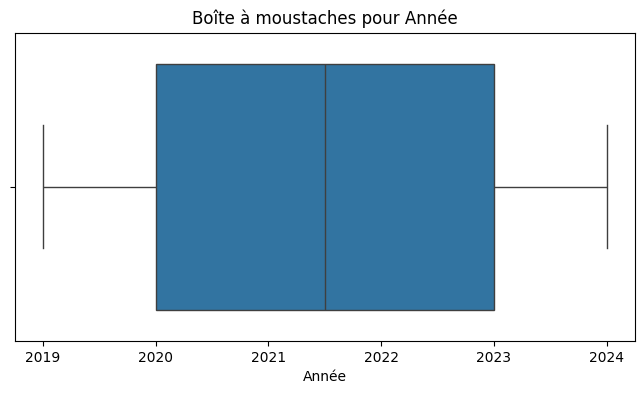

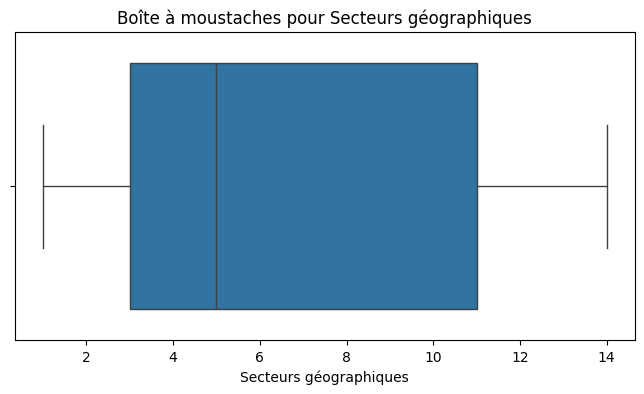

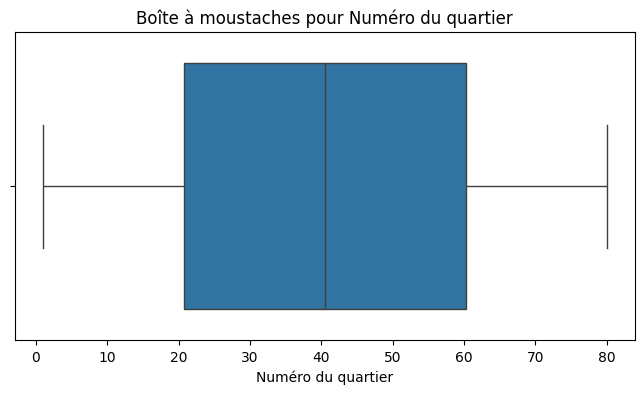

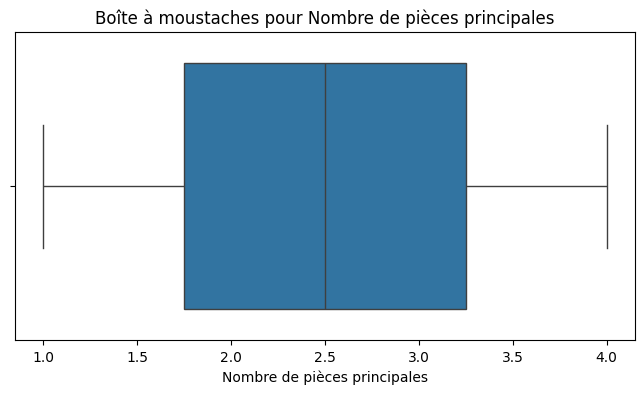

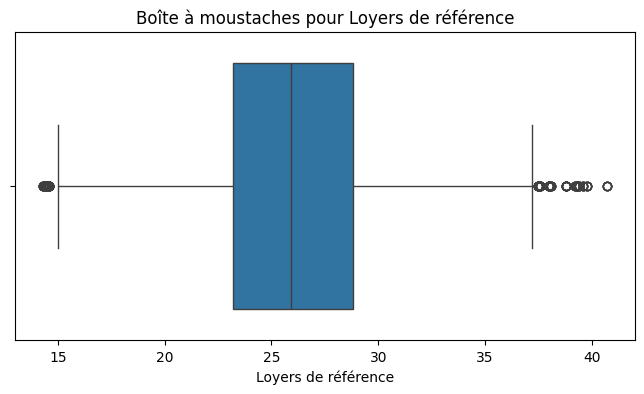

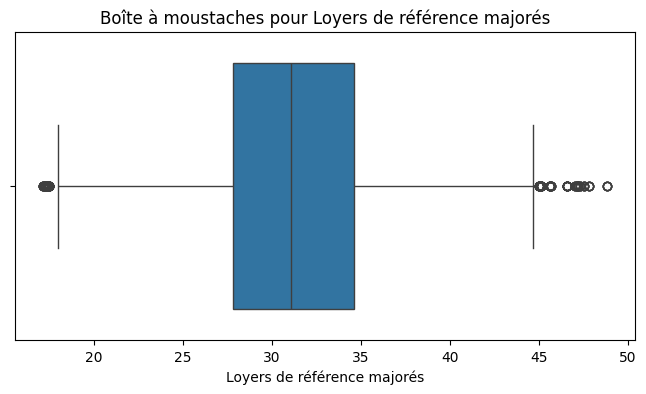

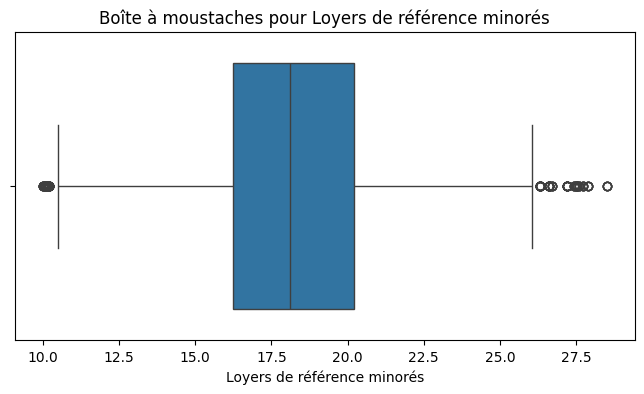

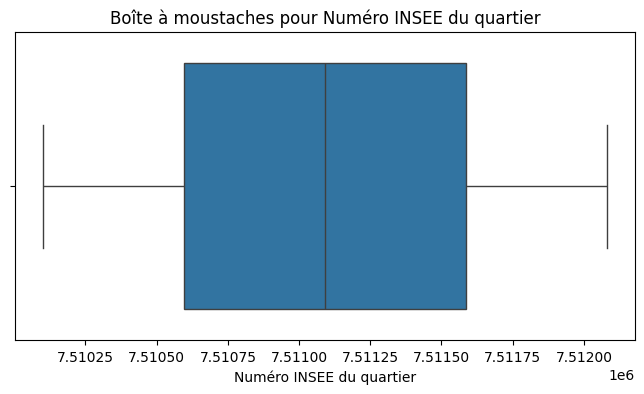

In [14]:


# Boîtes à moustaches pour chaque colonne numérique
for col in colonnes_numeriques:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=loy[col])
    plt.title(f"Boîte à moustaches pour {col}")
    plt.show()


In [15]:
from scipy.stats import kstest

for col in colonnes_numeriques:
    stat, p = kstest(loy[col], 'norm')
    print(f"{col} : Statistique = {stat}, p-valeur = {p}")
    if p > 0.05:
        print(f" -> La distribution de {col} semble normale.")
    else:
        print(f" -> La distribution de {col} n'est pas normale.")


Année : Statistique = 1.0, p-valeur = 0.0
 -> La distribution de Année n'est pas normale.
Secteurs géographiques : Statistique = 0.9147498680518208, p-valeur = 0.0
 -> La distribution de Secteurs géographiques n'est pas normale.
Numéro du quartier : Statistique = 0.9736501019683699, p-valeur = 0.0
 -> La distribution de Numéro du quartier n'est pas normale.
Nombre de pièces principales : Statistique = 0.8413447460685429, p-valeur = 0.0
 -> La distribution de Nombre de pièces principales n'est pas normale.
Loyers de référence : Statistique = 1.0, p-valeur = 0.0
 -> La distribution de Loyers de référence n'est pas normale.
Loyers de référence majorés : Statistique = 1.0, p-valeur = 0.0
 -> La distribution de Loyers de référence majorés n'est pas normale.
Loyers de référence minorés : Statistique = 1.0, p-valeur = 0.0
 -> La distribution de Loyers de référence minorés n'est pas normale.
Numéro INSEE du quartier : Statistique = 1.0, p-valeur = 0.0
 -> La distribution de Numéro INSEE du qua

Les distributions de nos variables ne sont pas normales. Nous ne considererons donc pas le zscore.

Encodage des variables catégorielles avec le one hot encoding

In [16]:
# Affichage des valeurs uniques de la colonne "Epoque de construction"
valeurs_uniques = loy['Epoque de construction'].unique()
print("Valeurs uniques de la colonne 'Epoque de construction' :")
print(valeurs_uniques)


Valeurs uniques de la colonne 'Epoque de construction' :
['Apres 1990' 'Avant 1946' '1971-1990' '1946-1970']


In [17]:
# Définition de l'ordre des catégories
ordre_categories = ['Avant 1946', '1946-1970', '1971-1990', 'Apres 1990']

loy['Epoque de construction'] = pd.Categorical(loy['Epoque de construction'],
                                              categories=ordre_categories,
                                              ordered=True)

# Encodage des catégories en entiers
loy['Epoque de construction'] = loy['Epoque de construction'].cat.codes + 1
print(loy[['Epoque de construction']].head())


   Epoque de construction
0                       4
1                       1
2                       4
3                       3
4                       4


In [18]:
loy['Epoque de construction'].unique()

array([4, 1, 3, 2], dtype=int8)

In [19]:
import json

# Vérifions que toutes les géométries ont comme type "Polygon"
def is_polygon(geo_shape):
    try:
        # Chargement des données JSON
        geo_json = json.loads(geo_shape)
        # Vérifions si le type est "Polygon"
        return geo_json.get("type") == "Polygon"
    except (json.JSONDecodeError, AttributeError):
        return False


loy['is_polygon'] = loy['geo_shape'].apply(is_polygon)

# Vérifions si toutes les lignes sont des "Polygon"
if loy['is_polygon'].all():
    print("Toutes les géométries de la colonne 'geo_shape' sont de type 'Polygon'.")
else:
    print("Certaines géométries de la colonne 'geo_shape' ne sont pas de type 'Polygon'.")
    print(loy[~loy['is_polygon']])  # Affiche les lignes qui ne sont pas des polygones


Toutes les géométries de la colonne 'geo_shape' sont de type 'Polygon'.


In [20]:
# Recherche "polygone" dans la colonne "geo_shape"
colonne = "geo_shape"
loy['polygon_present'] = loy[colonne].astype(str).str.contains("Polygon", na=False)

# Affiche les lignes où le mot "polygon" est trouvé
resultats = loy[loy['polygon_present']]


# Compte les lignes où "polygon" est présent
nombre_lignes = loy['polygon_present'].sum()
print(f"Nombre de lignes où 'Polygon' est présent : {nombre_lignes}")


Nombre de lignes où 'Polygon' est présent : 15360


Au vu des valeurs de l'époque de construction (Avant 1946, 1946-1971, 1971-1990, Aprs 1990), nous avons préféré utiliser un encodage rangé dans le même ordre que les années.

In [21]:

#colonnes_categorielles = loy.select_dtypes(include=['object']).columns
#print("Colonnes catégorielles :", colonnes_categorielles)
#loy_encode = pd.get_dummies(loy, columns=colonnes_categorielles, drop_first=True)
#loy_encode.head(1)


In [22]:

import geopandas as gpd
from shapely.geometry import shape



# Conversion d'une chaîne JSON en objet Shapely
def geojson_to_shape(geojson_str):
    try:
        geojson = json.loads(geojson_str)  # Chargement de la chaîne JSON
        return shape(geojson)             # Conversion en objet Shapely
    except (json.JSONDecodeError, AttributeError):
        return None  # Retourne None si la conversion échoue

# Appliquons la conversion à la colonne 'geo_shape'
loy["geometry"] = loy["geo_shape"].apply(geojson_to_shape)

# Conversion du DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(loy, geometry="geometry", crs="EPSG:4326")  # EPSG:4326 = coordonnées WGS84 (lat/lon)

# Reprojection en EPSG:2154 (métrique) pour calculer des aires, le choix de cette métrique étant motivé par le fait qu'il s'agisse de paris
gdf = gdf.to_crs("EPSG:2154")

# Calcul de l'aire de chaque polygone et création d'une nouvelle colonne
gdf["area_m2"] = gdf["geometry"].area

# Ajout de la colonne des aires au DataFrame original
loy["area_m2"] = gdf["area_m2"]

# Affichage des résultats
print(loy[["geo_shape", "area_m2"]])


                                               geo_shape       area_m2
0      {"coordinates": [[[2.363764600226478, 48.85567...  4.220282e+05
1      {"coordinates": [[[2.367706331140409, 48.81742...  3.044178e+06
2      {"coordinates": [[[2.3684797205288945, 48.8558...  3.677284e+05
3      {"coordinates": [[[2.3724339136735346, 48.8761...  8.837260e+05
4      {"coordinates": [[[2.3797208188869265, 48.8534...  1.172087e+06
...                                                  ...           ...
15355  {"coordinates": [[[2.37320476223406, 48.840570...  1.235916e+06
15356  {"coordinates": [[[2.370498649617153, 48.87819...  1.285705e+06
15357  {"coordinates": [[[2.3962365762994087, 48.8541...  9.296092e+05
15358  {"coordinates": [[[2.2456248612503424, 48.8763...  5.477898e+06
15359  {"coordinates": [[[2.3291367318599567, 48.8341...  1.345774e+06

[15360 rows x 2 columns]


<Axes: >

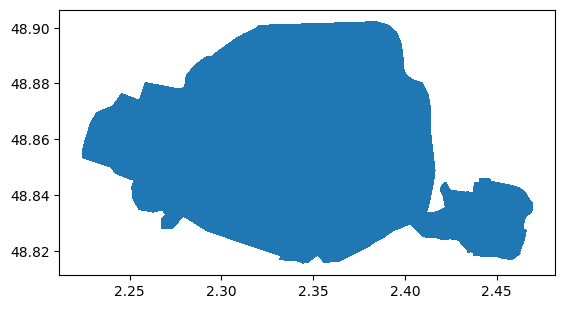

In [23]:
# Application de la fonction de conversion à la colonne 'geo_shape'
loy["geometry"] = loy["geo_shape"].apply(geojson_to_shape)
# Conversion en GeoDataFrame
gdf = gpd.GeoDataFrame(loy, geometry="geometry", crs="EPSG:4326")
gdf.plot()


<Axes: >

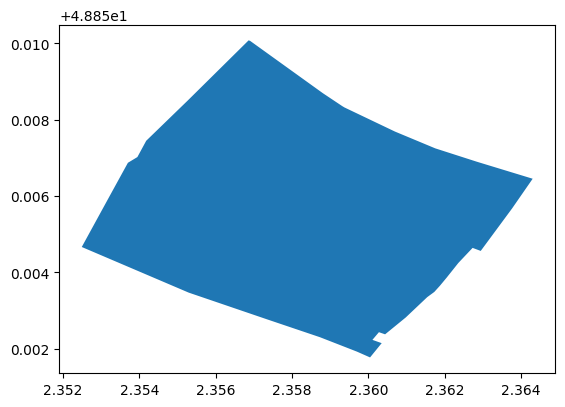

In [24]:
first_geometry = gdf.loc[0, "geometry"]

gpd.GeoSeries(first_geometry).plot()


In [25]:
from shapely.geometry import shape
from pyproj import Geod

# Initialisation de l'objet Geod pour les calculs géographiques
geod = Geod(ellps="WGS84")

# Fonction pour calculer l'aire et le périmètre d'une géométrie en GeoJSON
def calculate_area_perimeter(geojson_str):
    try:
        polygon = shape(json.loads(geojson_str))  # Conversion de GeoJSON en Shapely geometry
        area, _ = geod.geometry_area_perimeter(polygon)  # Calcul de l'aire
        return abs(area)  # Retourne l'aire absolue en m²
    except Exception as e:
        return None  # Retourne None en cas d'erreur

# Application de la fonction à toute la colonne 'geo_shape'
loy["area_m2"] = loy["geo_shape"].apply(calculate_area_perimeter)

# Affichage des résultats
print(loy[["geo_shape", "area_m2"]].head())


                                           geo_shape       area_m2
0  {"coordinates": [[[2.363764600226478, 48.85567...  4.221194e+05
1  {"coordinates": [[[2.367706331140409, 48.81742...  3.044959e+06
2  {"coordinates": [[[2.3684797205288945, 48.8558...  3.678060e+05
3  {"coordinates": [[[2.3724339136735346, 48.8761...  8.838909e+05
4  {"coordinates": [[[2.3797208188869265, 48.8534...  1.172338e+06


In [26]:
!pip install area


  Preparing metadata (setup.py) ... done
  Created wheel for area: filename=area-1.1.1-py3-none-any.whl size=3606 sha256=5af3e21f60aab1f4e439e8762c782181ea91139882219d26ada965bec20eb1a7
  Stored in directory: /root/.cache/pip/wheels/15/5b/3e/1f8475267c63bab636b42205e490569a75762f0803b8613670
Successfully built area


In [27]:
from area import area

# Fonction pour calculer l'aire à partir d'une chaîne GeoJSON
def calculate_area_with_area(geojson_str):
    try:
        geojson = json.loads(geojson_str)  # Chargement de la chaîne GeoJSON
        return area(geojson)  # Retourne l'aire en m²
    except Exception as e:
        return None  # Retourne None en cas d'erreur

# Appliquons la fonction à toute la colonne 'geo_shape'
loy["area_m2"] = loy["geo_shape"].apply(calculate_area_with_area)

# Affichons les résultats
print(loy[["geo_shape", "area_m2"]].head())


                                           geo_shape       area_m2
0  {"coordinates": [[[2.363764600226478, 48.85567...  4.217438e+05
1  {"coordinates": [[[2.367706331140409, 48.81742...  3.042270e+06
2  {"coordinates": [[[2.3684797205288945, 48.8558...  3.674783e+05
3  {"coordinates": [[[2.3724339136735346, 48.8761...  8.831000e+05
4  {"coordinates": [[[2.3797208188869265, 48.8534...  1.171294e+06


Quelque soit la méthode utilisée, les valeurs obtenues pour l'aire sont plus ou moins pareilles mais sont irréelles (par exemple 422743 mètre carré). Nous allons donc supprimer la variable geo_shape

In [28]:
del loy["geo_shape"]
loy.head(2)
loy.columns

Index(['Année', 'Secteurs géographiques', 'Numéro du quartier',
       'Nom du quartier', 'Nombre de pièces principales',
       'Epoque de construction', 'Type de location', 'Loyers de référence',
       'Loyers de référence majorés', 'Loyers de référence minorés', 'Ville',
       'Numéro INSEE du quartier', 'geo_point_2d', 'is_polygon',
       'polygon_present', 'geometry', 'area_m2'],
      dtype='object')

<ipython-input-29-7d1df425c23a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  loy.loc[2][15]


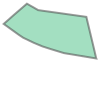

In [29]:
loy.loc[2][15]

In [30]:
import os
chemin_dossier = os.path.join(os.getcwd(), "Projet_python")
os.makedirs(chemin_dossier, exist_ok=True)
loy.to_excel(os.path.join(chemin_dossier, "loy_nouveau.xlsx"), index=False)
print(f"Fichier Excel enregistré avec succès dans : {chemin_dossier}")

Fichier Excel enregistré avec succès dans : /content/Projet_python


In [31]:
del loy['is_polygon']
del loy["area_m2"]
del loy['polygon_present']
del loy['geometry']

In [32]:
loy.columns

Index(['Année', 'Secteurs géographiques', 'Numéro du quartier',
       'Nom du quartier', 'Nombre de pièces principales',
       'Epoque de construction', 'Type de location', 'Loyers de référence',
       'Loyers de référence majorés', 'Loyers de référence minorés', 'Ville',
       'Numéro INSEE du quartier', 'geo_point_2d'],
      dtype='object')

**Transformation de la variable "geo_point_2d"**

In [33]:
import folium
# Conversion de la colonne 'geo_point_2d' en tuples (latitude, longitude)
loy["geo_point_2d"] = loy["geo_point_2d"].apply(
    lambda x: tuple(map(float, x.split(',')))
)

# Coordonnées des monuments célèbres
#monuments = {
    #"Tour Eiffel": (48.858844, 2.294351),
    #"Arc de Triomphe": (48.873792, 2.295028),
#}

# Création d'une carte centrée sur Paris
#m = folium.Map(location=[48.8566, 2.3522], zoom_start=13)

# Ajout des points des logements avec popup du loyer de référence
#for idx, row in loy.iterrows():
    #folium.Marker(
        #location=row["geo_point_2d"],  # Coordonnées du logement
        #popup=f"Loyer de référence : {row['Loyers de référence']} €",  # Popup avec le loyer
        #icon=folium.Icon(color="blue", icon="home"),  # Icône bleue pour les logements
    #).add_to(m)

# Ajout des monuments célèbres avec des marqueurs spécifiques
#for monument, coord in monuments.items():
    #folium.Marker(
        #location=coord,  # Coordonnées du monument
        #popup=monument,  # Nom du monument
        #icon=folium.Icon(color="red", icon="info-sign"),  # Icône rouge pour les monuments
    #).add_to(m)

# Enregistrons la carte dans un fichier HTML
#m.save("carte_logements_paris.html")

# Affichons la carte directement dans un environnement Jupyter/Colab
#m


In [34]:
# Extrayons les 100 premières lignes du DataFrame
loy_100 = loy.head(100)


# Créons une carte centrée sur Paris
m = folium.Map(location=[48.8566, 2.3522], zoom_start=13)

# Ajoutons les points des logements avec popup
for idx, row in loy_100.iterrows():
    folium.Marker(
        location=row["geo_point_2d"],  # Coordonnées du logement
        popup=f"Loyer de référence : {row['Loyers de référence']} €",
        icon=folium.Icon(color="blue", icon="home"),
    ).add_to(m)

# Ajoutons des monuments célèbres
monuments = {
    "Tour Eiffel": (48.858844, 2.294351),
    "Arc de Triomphe": (48.873792, 2.295028),
    "Musée du Louvre": (48.860611, 2.337644),
    "Notre-Dame": (48.852968, 2.349902),
    "Sacré-Cœur": (48.886708, 2.343104),
    "Place de la Concorde": (48.865633, 2.321236),
    "Panthéon": (48.846222, 2.345836),
    "Musée d'Orsay": (48.859961, 2.326561),
}


for monument, coord in monuments.items():
    folium.Marker(
        location=coord,
        popup=monument,
        icon=folium.Icon(color="red", icon="info-sign"),
    ).add_to(m)

# Affichons la carte
m.save("carte_logements_100.html")
#m


In [35]:
#from geopy.distance import geodesic

# Coordonnées des monuments célèbres
#monuments = {
    #"Tour Eiffel": (48.858844, 2.294351),
    #"Arc de Triomphe": (48.873792, 2.295028),
    #"Musée du Louvre": (48.860611, 2.337644),
    #"Notre-Dame": (48.852968, 2.349902),
    #"Sacré-Cœur": (48.886708, 2.343104),
    #"Place de la Concorde": (48.865633, 2.321236),
#}

# Calculons le centroïde
#latitudes = [coord[0] for coord in monuments.values()]
#longitudes = [coord[1] for coord in monuments.values()]

#centroide_monuments = (sum(latitudes) / len(latitudes), sum(longitudes) / len(longitudes))
#print(f"Centroïde des monuments célèbres : {centroide_monuments}")


In [36]:
# Calculons la distance de chaque logement au centroïde
#loy["Distance_centroide"] = loy["geo_point_2d"].apply(
    #lambda x: geodesic(x, centroide_monuments).meters
#)

loy.head(2)


Année  Secteurs géographiques  Numéro du quartier Nom du quartier  \
0   2024                       4                  14   Saint-Gervais   
1   2024                      13                  50            Gare   

   Nombre de pièces principales  Epoque de construction Type de location  \
0                             3                       4       non meublé   
1                             4                       1           meublé   

   Loyers de référence  Loyers de référence majorés  \
0                 23.7                         28.4   
1                 23.4                         28.1   

   Loyers de référence minorés  Ville  Numéro INSEE du quartier  \
0                         16.6  PARIS                   7510414   
1                         16.4  PARIS                   7511350   

                              geo_point_2d  
0   (48.85571865089275, 2.358162333852766)  
1  (48.82752745777257, 2.3723977369189355)

In [37]:
from geopy.distance import geodesic


# Données des visiteurs par monument et par année
visitors = {
    "Tour Eiffel": {2019: 6140000, 2020: 1560000, 2021: 2058000, 2022: 5849000, 2023: 6318000, 2024: 6300000},
    "Musée du Louvre": {2019: 9600000, 2020: 2700000, 2021: 2800000, 2022: 7730000, 2023: 8900000, 2024: 8700000},
    "Arc de Triomphe": {2019: 1606771, 2020: 700000, 2021: 1200000, 2022: 1500000, 2023: 1758087, 2024: 1800000},
    "Musée d'Orsay": {2019: 3200000, 2020: 1300000, 2021: 1900000, 2022: 3500000, 2023: 3871498, 2024: 4000000},
    "Sacré-Cœur": {2019: 11000000, 2020: 7000000, 2021: 9500000, 2022: 10500000, 2023: 11000000, 2024: 11500000},
}

# Coordonnées des monuments
monuments = {
    "Tour Eiffel": (48.858844, 2.294351),
    "Musée du Louvre": (48.860611, 2.337644),
    "Arc de Triomphe": (48.873792, 2.295028),
    "Musée d'Orsay": (48.8600, 2.3266),
    "Sacré-Cœur": (48.886708, 2.343104),
}

# Fonction pour calculer la distance pondérée
def weighted_distance(coord, year, monuments, visitors):
    total_weight = 0
    weighted_sum = 0

    for monument, coords in monuments.items():
        distance = geodesic(coord, coords).meters  # Distance en mètres
        weight = visitors[monument][year]  # Poids basé sur les visiteurs
        weighted_sum += distance * weight
        total_weight += weight

    return weighted_sum / total_weight  # Moyenne pondérée

# Appliqué à chaque logement

loy["Distance_centroide"] = loy.apply(
    lambda row: weighted_distance(
        row["geo_point_2d"],  # Utilisation directe comme tuple
        row["Année"],  # Année correspondante
        monuments,
        visitors,
    ),
    axis=1
)


In [38]:

loy[loy['Distance_centroide'] ==loy['Distance_centroide'].max()]

Année  Secteurs géographiques  Numéro du quartier Nom du quartier  \
235     2021                       9                  46          Picpus   
442     2021                       9                  46          Picpus   
646     2021                       9                  46          Picpus   
647     2021                       9                  46          Picpus   
831     2021                       9                  46          Picpus   
934     2021                       9                  46          Picpus   
1770    2021                       9                  46          Picpus   
2237    2021                       9                  46          Picpus   
2862    2021                       9                  46          Picpus   
3548    2021                       9                  46          Picpus   
3574    2021                       9                  46          Picpus   
3598    2021                       9                  46          Picpus   
4554    2021                       9                  46          Picpus   
4594    2021                       9                  46          Picpus   
4599    2021                       9                  46          Picpus   
4602    2021                       9                  46          Picpus   
4661    2021                       9                  46          Picpus   
5662    2021                       9                  46          Picpus   
5778    2021                       9                  46          Picpus   
7338    2021                       9                  46          Picpus   
7981    2021                       9                  46          Picpus   
7983    2021                       9                  46          Picpus   
8680    2021                       9                  46          Picpus   
8698    2021                       9                  46          Picpus   
10154   2021                       9                  46          Picpus   
10255   2021                       9                  46          Picpus   
10382   2021                       9                  46          Picpus   
10970   2021                       9                  46          Picpus   
11690   2021                       9                  46          Picpus   
11704   2021                       9                  46          Picpus   
14457   2021                       9                  46          Picpus   
14933   2021                       9                  46          Picpus   

       Nombre de pièces principales  Epoque de construction Type de location  \
235                               4                       3       non meublé   
442                               2                       1       non meublé   
646                               1                       4       non meublé   
647                               3                       2           meublé   
831                               4                       1           meublé   
934                               1                       4           meublé   
1770                              2                       4           meublé   
2237                              1                       3       non meublé   
2862                              1                       2           meublé   
3548                              4                       2           meublé   
3574                              4                       4           meublé   
3598                              3                       3           meublé   
4554                              2                       1           meublé   
4594                              3                       2       non meublé   
4599                              3                       1           meublé   
4602                              4                       3           meublé   
4661                              2                       4       non meublé   
5662                              2                       

In [39]:
loy['Distance_centroide'].max()

8899.044297571461

In [40]:
loy[loy['Distance_centroide'] ==loy['Distance_centroide'].min()]

Année  Secteurs géographiques  Numéro du quartier Nom du quartier  \
225     2021                       5                  33   Saint-Georges   
958     2021                       5                  33   Saint-Georges   
1519    2021                       5                  33   Saint-Georges   
1788    2021                       5                  33   Saint-Georges   
1792    2021                       5                  33   Saint-Georges   
3492    2021                       5                  33   Saint-Georges   
3526    2021                       5                  33   Saint-Georges   
3576    2021                       5                  33   Saint-Georges   
3644    2021                       5                  33   Saint-Georges   
4880    2021                       5                  33   Saint-Georges   
5752    2021                       5                  33   Saint-Georges   
5779    2021                       5                  33   Saint-Georges   
6329    2021                       5                  33   Saint-Georges   
7327    2021                       5                  33   Saint-Georges   
7328    2021                       5                  33   Saint-Georges   
7594    2021                       5                  33   Saint-Georges   
8011    2021                       5                  33   Saint-Georges   
8220    2021                       5                  33   Saint-Georges   
8565    2021                       5                  33   Saint-Georges   
8631    2021                       5                  33   Saint-Georges   
8648    2021                       5                  33   Saint-Georges   
8684    2021                       5                  33   Saint-Georges   
10387   2021                       5                  33   Saint-Georges   
11008   2021                       5                  33   Saint-Georges   
11708   2021                       5                  33   Saint-Georges   
12657   2021                       5                  33   Saint-Georges   
13012   2021                       5                  33   Saint-Georges   
13056   2021                       5                  33   Saint-Georges   
13312   2021                       5                  33   Saint-Georges   
13326   2021                       5                  33   Saint-Georges   
14459   2021                       5                  33   Saint-Georges   
14554   2021                       5                  33   Saint-Georges   

       Nombre de pièces principales  Epoque de construction Type de location  \
225                               3                       3           meublé   
958                               3                       4           meublé   
1519                              2                       1           meublé   
1788                              3                       1       non meublé   
1792                              1                       2       non meublé   
3492                              1                       1           meublé   
3526                              3                       4       non meublé   
3576                              3                       1           meublé   
3644                              2                       2       non meublé   
4880                              4                       1           meublé   
5752                              4                       4           meublé   
5779                              1                       2           meublé   
6329                              4                       1       non meublé   
7327                              2                       4       non meublé   
7328                              1                       4       non meublé   
7594                              2                       2           meublé   
8011                              1                       1       non meublé   
8220                              4                       

In [41]:
del loy['Ville']
del loy['geo_point_2d']


In [42]:
loy.columns

Index(['Année', 'Secteurs géographiques', 'Numéro du quartier',
       'Nom du quartier', 'Nombre de pièces principales',
       'Epoque de construction', 'Type de location', 'Loyers de référence',
       'Loyers de référence majorés', 'Loyers de référence minorés',
       'Numéro INSEE du quartier', 'Distance_centroide'],
      dtype='object')

In [43]:
# Supprimons les lignes où 'Année' est égal à 2024
#loy = loy[loy["Année"] != 2024]
#print(loy["Année"].unique())


In [44]:
# Transformons les années pour commencer à 0
min_annee = loy["Année"].min()
loy["Année"] = loy["Année"] - min_annee

In [45]:
loy.columns

Index(['Année', 'Secteurs géographiques', 'Numéro du quartier',
       'Nom du quartier', 'Nombre de pièces principales',
       'Epoque de construction', 'Type de location', 'Loyers de référence',
       'Loyers de référence majorés', 'Loyers de référence minorés',
       'Numéro INSEE du quartier', 'Distance_centroide'],
      dtype='object')

In [46]:
# Calculons la corrélation
correlation_matrix = loy[['Numéro du quartier', 'Numéro INSEE du quartier', 'Secteurs géographiques']].corr()
print("Corrélation entre les colonnes :")
correlation_matrix


Corrélation entre les colonnes :


Numéro du quartier  Numéro INSEE du quartier  \
Numéro du quartier                  1.000000                  0.998916   
Numéro INSEE du quartier            0.998916                  1.000000   
Secteurs géographiques              0.703100                  0.700779   

                          Secteurs géographiques  
Numéro du quartier                      0.703100  
Numéro INSEE du quartier                0.700779  
Secteurs géographiques                  1.000000

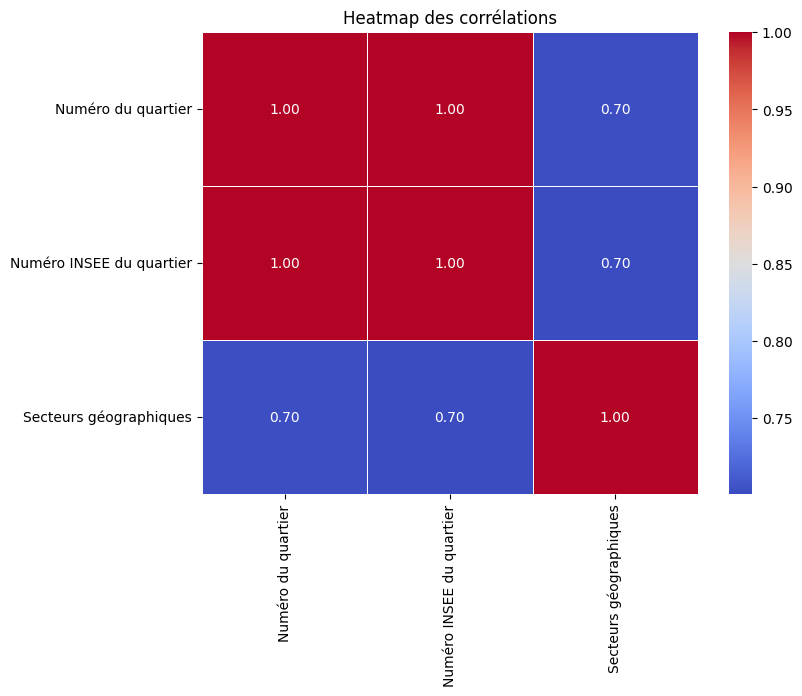

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap des corrélations")
plt.show()

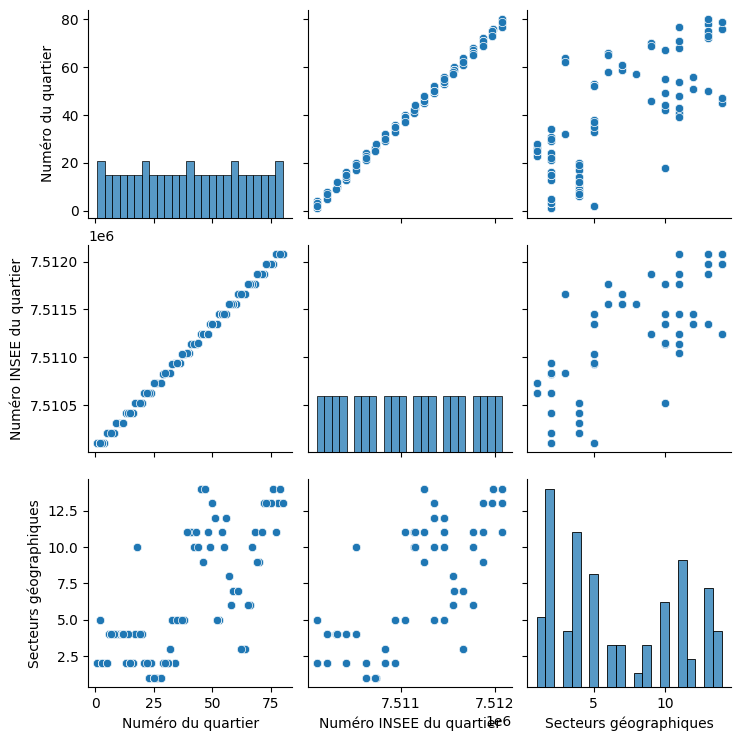

In [48]:
sns.pairplot(loy[['Numéro du quartier', 'Numéro INSEE du quartier', 'Secteurs géographiques']])
plt.show()


In [49]:
del loy['Nom du quartier']
del loy['Numéro INSEE du quartier']

In [50]:
loy.columns

Index(['Année', 'Secteurs géographiques', 'Numéro du quartier',
       'Nombre de pièces principales', 'Epoque de construction',
       'Type de location', 'Loyers de référence',
       'Loyers de référence majorés', 'Loyers de référence minorés',
       'Distance_centroide'],
      dtype='object')

In [51]:
# Recodons la colonne 'Type de location' par 0 si non meublé et 1 si meublé
loy['Type de location'] = loy['Type de location'].replace({'non meublé': 0, 'meublé': 1})

# Vérification
print(loy['Type de location'].unique())


[0 1]


<ipython-input-51-f25163517d6c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loy['Type de location'] = loy['Type de location'].replace({'non meublé': 0, 'meublé': 1})


In [52]:
loy.head(1)

Année  Secteurs géographiques  Numéro du quartier  \
0      5                       4                  14   

   Nombre de pièces principales  Epoque de construction  Type de location  \
0                             3                       4                 0   

   Loyers de référence  Loyers de référence majorés  \
0                 23.7                         28.4   

   Loyers de référence minorés  Distance_centroide  
0                         16.6         3209.713922

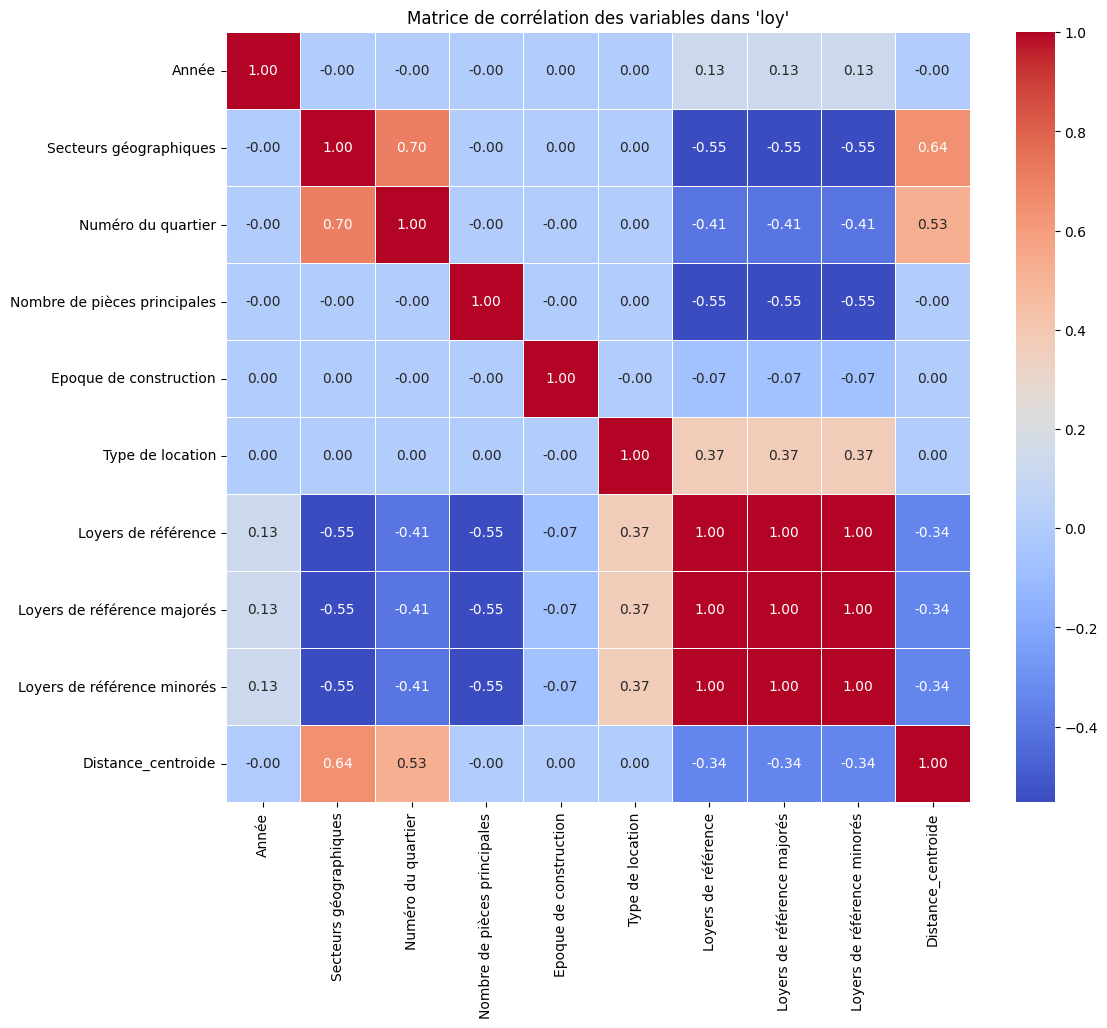

In [53]:
correlation_matrix = loy.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation des variables dans 'loy'")
plt.show()

In [54]:
# Calculons la corrélation de "Loyers de référence" avec les autres variables
correlation_with_rent = loy.corr()["Loyers de référence"].sort_values(ascending=False)

# Affichons les corrélations
print("Corrélations avec 'Loyers de référence' :")
print(correlation_with_rent)


Corrélations avec 'Loyers de référence' :
Loyers de référence             1.000000
Loyers de référence majorés     0.999992
Loyers de référence minorés     0.999977
Type de location                0.373514
Année                           0.127416
Epoque de construction         -0.071659
Distance_centroide             -0.344549
Numéro du quartier             -0.405170
Nombre de pièces principales   -0.550583
Secteurs géographiques         -0.552300
Name: Loyers de référence, dtype: float64


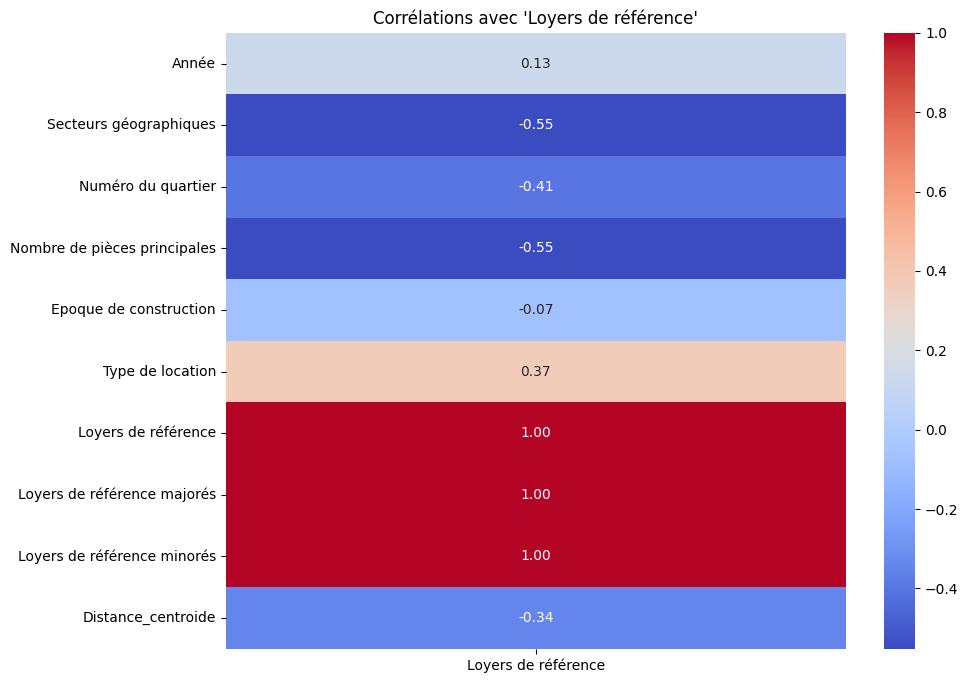

In [55]:

# Heatmap des corrélations avec 'Loyers de référence'
plt.figure(figsize=(10, 8))
sns.heatmap(loy.corr()[["Loyers de référence"]], annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Corrélations avec 'Loyers de référence'")
plt.show()


Les variables Loyers de référence majorés et loyers de référence minorés sont fortement corrélées à notre variable Loyers de référence. Nous allons pour notre première analyse les supprimer

In [56]:
del loy['Loyers de référence majorés']
del loy['Loyers de référence minorés']

In [57]:

# Corrélation de Spearman
spearman_corr = loy[['Epoque de construction', 'Loyers de référence']].corr(method='spearman')
print("Corrélation de Spearman :")
print(spearman_corr)

kendall_corr = loy[['Epoque de construction', 'Loyers de référence']].corr(method='kendall')
print("Corrélation de Kendall :")
print(kendall_corr)

Corrélation de Spearman :
                        Epoque de construction  Loyers de référence
Epoque de construction                1.000000            -0.064448
Loyers de référence                  -0.064448             1.000000
Corrélation de Kendall :
                        Epoque de construction  Loyers de référence
Epoque de construction                1.000000            -0.046569
Loyers de référence                  -0.046569             1.000000


In [58]:
from scipy.stats import f_oneway

# Séparons les loyers par catégorie d'époque
groupes = [loy[loy['Epoque de construction'] == categorie]['Loyers de référence']
           for categorie in loy['Epoque de construction'].unique()]

# Test ANOVA
stat, p_value = f_oneway(*groupes)
print(f"F-statistic : {stat}, p-value : {p_value}")


F-statistic : 285.86598564185783, p-value : 1.401376503401338e-180


In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Test post hoc Tukey HSD
tukey = pairwise_tukeyhsd(endog=loy['Loyers de référence'], groups=loy['Epoque de construction'], alpha=0.05)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -2.3576    0.0 -2.6019 -2.1134   True
     1      3  -2.2861    0.0 -2.5304 -2.0419   True
     1      4  -0.9382    0.0 -1.1825 -0.6939   True
     2      3   0.0715 0.8759 -0.1728  0.3157  False
     2      4   1.4194    0.0  1.1752  1.6637   True
     3      4   1.3479    0.0  1.1037  1.5922   True
----------------------------------------------------


Les tests de corrélation indiquent une très faible relation entre la variable cible et la variable époque. Mais le test d'Anova effectué indique qu'il existe des différences significatives entre les loyers de référence pour certaines catégories d'Epoque de construction , particulièrement Avant 1946 contre 1971-1990 , 1946-1970 , et Après 1990 .
1971-1990 vs Après 1990 et 1946-1970 . Il n'y a pas de différence significative entre 1971-1990 et 1946-1970 en termes de loyers.
Nous allons donc garder cette variable dans notre modèle pour le moment.

In [60]:

# Corrélation de Spearman
spearman_corr = loy[['Année', 'Loyers de référence']].corr(method='spearman')
print("Corrélation de Spearman :")
print(spearman_corr)

kendall_corr = loy[['Année', 'Loyers de référence']].corr(method='kendall')
print("Corrélation de Kendall :")
print(kendall_corr)

Corrélation de Spearman :
                        Année  Loyers de référence
Année                1.000000             0.126699
Loyers de référence  0.126699             1.000000
Corrélation de Kendall :
                       Année  Loyers de référence
Année                1.00000              0.09217
Loyers de référence  0.09217              1.00000


In [61]:
# Séparons les loyers par année
groupes = [loy[loy['Année'] == categorie]['Loyers de référence']
           for categorie in loy['Année'].unique()]

# Test ANOVA
stat, p_value = f_oneway(*groupes)
print(f"F-statistic : {stat}, p-value : {p_value}")


F-statistic : 52.0324116342105, p-value : 1.0511159852874765e-53


In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Test post hoc Tukey HSD
tukey = pairwise_tukeyhsd(endog=loy['Loyers de référence'], groups=loy['Année'], alpha=0.05)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.3389 0.0491  0.0008 0.6771   True
     0      2   0.5982    0.0    0.26 0.9364   True
     0      3   0.8288    0.0  0.4907  1.167   True
     0      4   1.1348    0.0  0.7967  1.473   True
     0      5   1.7115    0.0  1.3733 2.0496   True
     1      2   0.2593 0.2445 -0.0789 0.5975  False
     1      3   0.4899 0.0005  0.1518 0.8281   True
     1      4   0.7959    0.0  0.4578 1.1341   True
     1      5   1.3726    0.0  1.0344 1.7107   True
     2      3   0.2306 0.3753 -0.1075 0.5688  False
     2      4   0.5366 0.0001  0.1985 0.8748   True
     2      5   1.1133    0.0  0.7751 1.4514   True
     3      4    0.306 0.1024 -0.0321 0.6442  False
     3      5   0.8827    0.0  0.5445 1.2208   True
     4      5   0.5766    0.0  0.2385 0.9148   True
---------------------------------------------------


Tendance générale :

Les loyers de référence augmentent avec les années.
Les augmentations sont souvent significatives entre les premières années (2019, 2020, 2021) et les dernières (2023, 2024).
Années similaires :

Certaines années proches (par exemple, 2020 et 2021, ou 2022 et 2023) n'ont pas de différences significatives, suggérant une évolution plus lente des loyers sur ces périodes.


#Modèle de Régression Linéaire

In [63]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Variables explicatives (X) et la cible (y)
X = loy.drop(columns=['Loyers de référence'])
y = loy['Loyers de référence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# prédictions sur les données de test
y_pred = model.predict(X_test)

# 5. Évaluation du modèle
r2 = r2_score(y_test, y_pred)  # Coefficient de détermination
mse = mean_squared_error(y_test, y_pred)  # Racine de l'erreur quadratique moyenne
rmse = np.sqrt(mse)
print(f"R² : {r2:.3f}")
print(f"RMSE : {rmse:.3f}")


R² : 0.760
RMSE : 2.044


In [64]:
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)


                       Variable  Coefficient
5              Type de location     3.234397
0                         Année     0.314105
6            Distance_centroide     0.000061
2            Numéro du quartier    -0.006079
4        Epoque de construction    -0.261906
1        Secteurs géographiques    -0.552521
3  Nombre de pièces principales    -2.109535


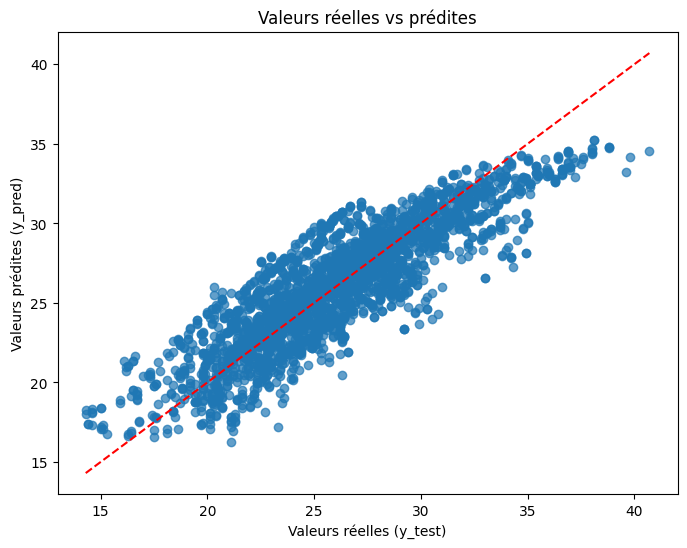

In [65]:


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Valeurs prédites (y_pred)")
plt.title("Valeurs réelles vs prédites")
plt.show()


In [66]:
print(f"Minimum de 'Loyers de référence' : {y.min()}")
print(f"Maximum de 'Loyers de référence' : {y.max()}")
print(f"Écart type de 'Loyers de référence' : {y.std()}")


Minimum de 'Loyers de référence' : 14.3
Maximum de 'Loyers de référence' : 40.7
Écart type de 'Loyers de référence' : 4.280012284059791


In [67]:
cvrmse = rmse / y.mean()
print(f"CVRMSE : {cvrmse * 100:.2f} %")


CVRMSE : 7.81 %


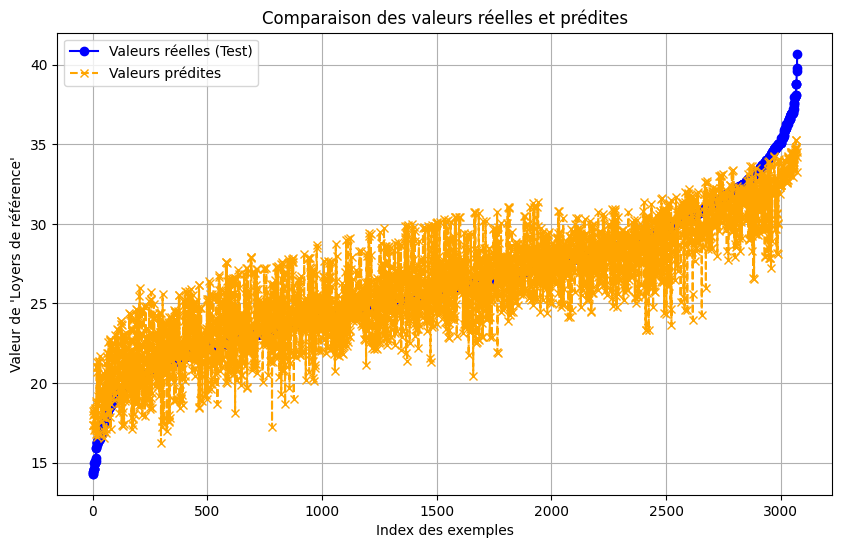

In [68]:

sorted_indices = np.argsort(y_test)

# Réorganisons les valeurs réelles et prédites selon l'ordre croissant de y_test
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_sorted = np.array(y_pred)[sorted_indices]

#courbes
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label="Valeurs réelles (Test)", marker='o', linestyle='-', color='blue')
plt.plot(y_pred_sorted, label="Valeurs prédites", marker='x', linestyle='--', color='orange')

plt.title("Comparaison des valeurs réelles et prédites")
plt.xlabel("Index des exemples")
plt.ylabel("Valeur de 'Loyers de référence'")
plt.legend()
plt.grid()
plt.show()


In [69]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Ajoutons une constante pour le calcul du VIF
X_with_const = sm.add_constant(X)

# Calculons le VIF pour chaque variable explicative
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i + 1) for i in range(X.shape[1])]

print(vif_data)


                       Variable       VIF
0                         Année  1.000025
1        Secteurs géographiques  2.484775
2            Numéro du quartier  2.015028
3  Nombre de pièces principales  1.000000
4        Epoque de construction  1.000000
5              Type de location  1.000000
6            Distance_centroide  1.738126


In [70]:
# Modèle avec toutes les variables
model_full = LinearRegression().fit(X, y)
r2_full = model_full.score(X, y)

# Modèle avec une variable supprimée
X_reduced = X.drop(columns=["Secteurs géographiques"])
model_reduced = LinearRegression().fit(X_reduced, y)
r2_reduced = model_reduced.score(X_reduced, y)

print(f"R² avec les deux variables : {r2_full}")
print(f"R² sans 'Secteurs géographiques' : {r2_reduced}")


R² avec les deux variables : 0.7699459935181001
R² sans 'Secteurs géographiques' : 0.651845037984032


In [71]:

# Modèle avec la variable Distance_centroide supprimée
X_reduced1 = X.drop(columns=["Distance_centroide"])
model_reduced1 = LinearRegression().fit(X_reduced1, y)
r2_reduced1 = model_reduced1.score(X_reduced1, y)

print(f"R² avec les deux variables : {r2_full}")
print(f"R² sans 'Distance_centroide' : {r2_reduced1}")


R² avec les deux variables : 0.7699459935181001
R² sans 'Distance_centroide' : 0.7696208418782267


In [72]:
# Modèle avec la variable Numéro du quartier supprimée
X_reduced2 = X.drop(columns=["Numéro du quartier"])
model_reduced2 = LinearRegression().fit(X_reduced2, y)
r2_reduced2 = model_reduced2.score(X_reduced2, y)

print(f"R² avec les deux variables : {r2_full}")
print(f"R² sans 'Numéro du quartier' : {r2_reduced2}")

R² avec les deux variables : 0.7699459935181001
R² sans 'Numéro du quartier' : 0.7692737400676516


In [73]:

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

# Résumé des résultats
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Loyers de référence   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.770
Method:                  Least Squares   F-statistic:                     7340.
Date:                 Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                         12:50:21   Log-Likelihood:                -32842.
No. Observations:                15360   AIC:                         6.570e+04
Df Residuals:                    15352   BIC:                         6.576e+04
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

In [74]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Modèle avec toutes les variables
scores_full = cross_val_score(LinearRegression(), X, y, cv=kfold, scoring='r2')
rmse_full = cross_val_score(LinearRegression(), X, y, cv=kfold, scoring=rmse_scorer)

# Modèle sans 'Numéro du quartier'
X_reduced2 = X.drop(columns=["Numéro du quartier"])
scores_reduced2 = cross_val_score(LinearRegression(), X_reduced2, y, cv=kfold, scoring='r2')
rmse_reduced2 = cross_val_score(LinearRegression(), X_reduced2, y, cv=kfold, scoring=rmse_scorer)

# Résultats des performances
print("Modèle avec toutes les variables :")
print(f"R² moyen : {np.mean(scores_full):.4f} ± {np.std(scores_full):.4f}")
print(f"RMSE moyen : {np.abs(np.mean(rmse_full)):.4f} ± {np.std(rmse_full):.4f}")

print("\nModèle sans 'Numéro du quartier' :")
print(f"R² moyen : {np.mean(scores_reduced2):.4f} ± {np.std(scores_reduced2):.4f}")
print(f"RMSE moyen : {np.abs(np.mean(rmse_reduced2)):.4f} ± {np.std(rmse_reduced2):.4f}")


Modèle avec toutes les variables :
R² moyen : 0.7694 ± 0.0059
RMSE moyen : 2.0541 ± 0.0239

Modèle sans 'Numéro du quartier' :
R² moyen : 0.7688 ± 0.0061
RMSE moyen : 2.0570 ± 0.0239


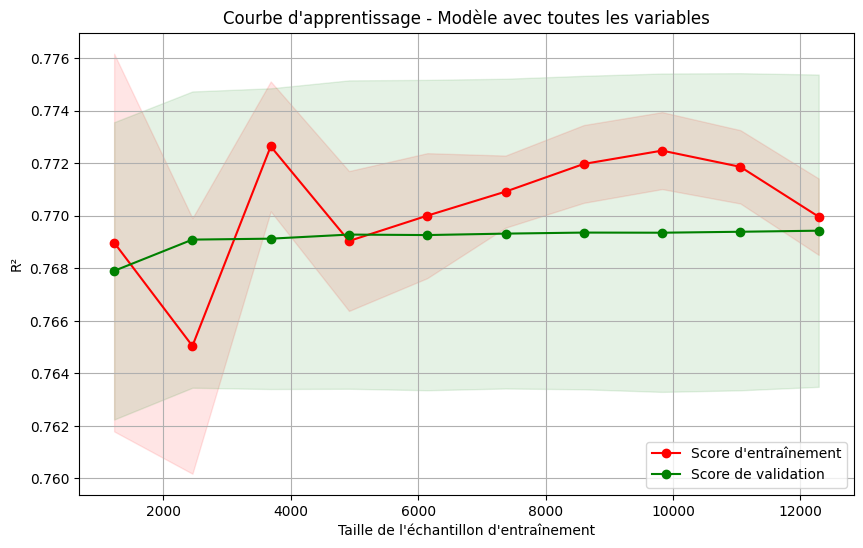

In [75]:
from sklearn.model_selection import learning_curve

model = LinearRegression()

# Calcul de la courbe d'apprentissage pour le modèle avec toutes les variables
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=kfold, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyenne et écart-type des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracons la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.title("Courbe d'apprentissage - Modèle avec toutes les variables")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid()
plt.show()


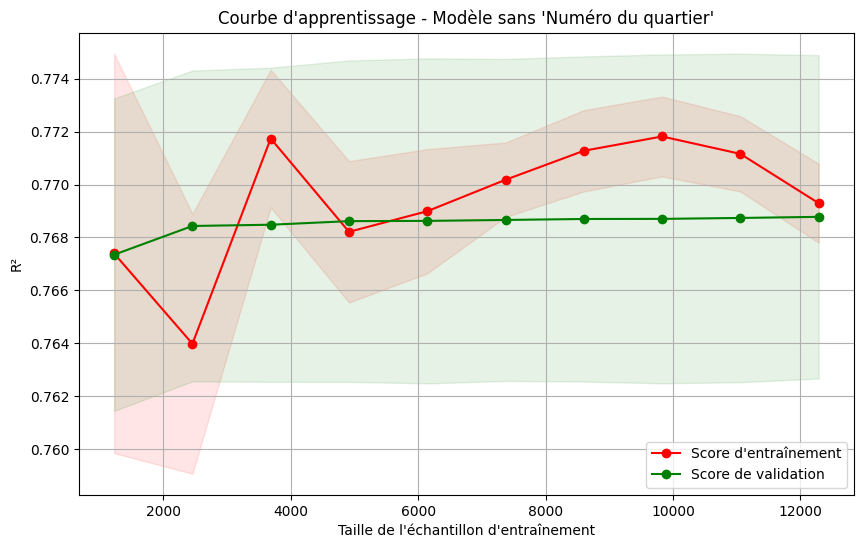

In [76]:
# Modèle réduit
X_reduced2 = X.drop(columns=["Numéro du quartier"])

# Courbe d'apprentissage pour le modèle réduit
train_sizes, train_scores, test_scores = learning_curve(
    model, X_reduced2, y, cv=kfold, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyenne et écart-type des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracons la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.title("Courbe d'apprentissage - Modèle sans 'Numéro du quartier'")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid()
plt.show()


In [77]:
# Modèle sans 'Distance_centroide'
X_reduced1 = X.drop(columns=["Distance_centroide"])
scores_reduced1 = cross_val_score(LinearRegression(), X_reduced1, y, cv=kfold, scoring='r2')
rmse_reduced1 = cross_val_score(LinearRegression(), X_reduced1, y, cv=kfold, scoring=rmse_scorer)

# Résultats des performances
print("Modèle avec toutes les variables :")
print(f"R² moyen : {np.mean(scores_full):.4f} ± {np.std(scores_full):.4f}")
print(f"RMSE moyen : {np.abs(np.mean(rmse_full)):.4f} ± {np.std(rmse_full):.4f}")

print("\nModèle sans 'Distance centroid' :")
print(f"R² moyen : {np.mean(scores_reduced1):.4f} ± {np.std(scores_reduced1):.4f}")
print(f"RMSE moyen : {np.abs(np.mean(rmse_reduced1)):.4f} ± {np.std(rmse_reduced1):.4f}")


Modèle avec toutes les variables :
R² moyen : 0.7694 ± 0.0059
RMSE moyen : 2.0541 ± 0.0239

Modèle sans 'Distance centroid' :
R² moyen : 0.7691 ± 0.0060
RMSE moyen : 2.0554 ± 0.0240


Vérifions sur la mise à échelle des données peut améliorer notre modèle

In [78]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for scaler_name, scaler in scalers.items():
    # Appliquons la standardisation
    X_scaled = scaler.fit_transform(X)

    # Modèle
    model = LinearRegression()

    # Validation croisée
    scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='r2')
    results[scaler_name] = (np.mean(scores), np.std(scores))

# Affichons les résultats
for scaler_name, (mean_score, std_score) in results.items():
    print(f"{scaler_name}: R² moyen = {mean_score:.4f}, écart-type = {std_score:.4f}")


StandardScaler: R² moyen = 0.7694, écart-type = 0.0059
MinMaxScaler: R² moyen = 0.7694, écart-type = 0.0059
RobustScaler: R² moyen = 0.7694, écart-type = 0.0059


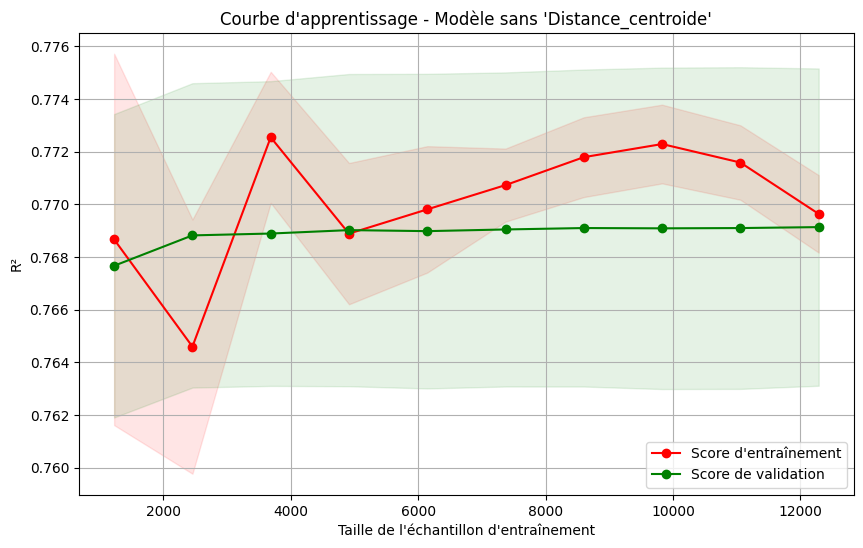

In [79]:
# Modèle réduit (sans 'Distance_centroide')
X_reduced = X.drop(columns=["Distance_centroide"])
model = LinearRegression()

# Calcul de la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    model, X_reduced, y, cv=kfold, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyenne et écart-type des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracons la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.title("Courbe d'apprentissage - Modèle sans 'Distance_centroide'")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid()
plt.show()


**Validation croisée**

In [80]:
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

# Affichage des résultats
print(f"Scores pour chaque fold : {scores}")
print(f"Moyenne des scores (R²) : {np.mean(scores):.3f}")
print(f"Écart-type des scores : {np.std(scores):.3f}")


Scores pour chaque fold : [0.76034069 0.76926709 0.77743699 0.76624376 0.77389229]
Moyenne des scores (R²) : 0.769
Écart-type des scores : 0.006


In [81]:
scores_rmse = cross_val_score(model, X, y, cv=kfold, scoring='neg_root_mean_squared_error')
print(f"RMSE moyen : {-np.mean(scores_rmse):.3f}")


RMSE moyen : 2.054


In [82]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    #"Gradient Boosting": XGBRegressor(),
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name}: R² moyen = {np.mean(scores):.4f}")


Linear Regression: R² moyen = 0.7696
Random Forest: R² moyen = 0.9977


#RandomForest

In [83]:
from sklearn.model_selection import GridSearchCV

# Modèle de base
rf = RandomForestRegressor(random_state=42)

# Grille d'hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Recherche sur grille
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
478 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py"

Meilleurs hyperparamètres :  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [84]:

best_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)
best_rf.fit(X_train, y_train)


RandomForestRegressor(max_features='sqrt', n_estimators=300, random_state=42)

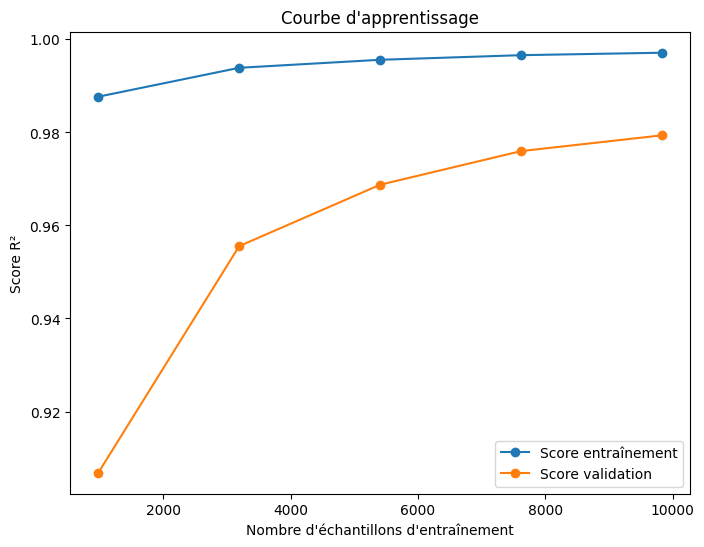

In [85]:


# Générons la courbe d'apprentissage pour le meilleur modele désigné par la recherche d'hyperparamètres
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring='r2', n_jobs=-1
)

# Moyenne et écart-type
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Score entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Score validation')
plt.xlabel('Nombre d\'échantillons d\'entraînement')
plt.ylabel('Score R²')
plt.legend()
plt.title('Courbe d\'apprentissage')
plt.show()


In [86]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)


                        Feature  Importance
3  Nombre de pièces principales    0.357414
1        Secteurs géographiques    0.222660
5              Type de location    0.137812
2            Numéro du quartier    0.125776
4        Epoque de construction    0.080837
6            Distance_centroide    0.051992
0                         Année    0.023509


In [87]:

# Ordre des variables par importance
features_ranked = ["Nombre de pièces principales", "Secteurs géographiques",
                   "Type de location", "Numéro du quartier",
                   "Epoque de construction", "Distance_centroide", "Année"]

# Initialisation des résultats
results = []

# Boucle pour ajouter progressivement les variables
for i in range(1, len(features_ranked) + 1):
    selected_features = features_ranked[:i]  # Sélection des i premières variables
    X_reduced = X[selected_features]

    # Division des données
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

    # Modèle Random Forest
    model = RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        random_state=42
    )

    # Entraînons le modèle
    model.fit(X_train, y_train)

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Évaluons les performances
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((selected_features, r2, rmse))

    print(f"Modèle avec {i} variables : {selected_features}")
    print(f"R² : {r2:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print("-" * 50)

# Analysons les résultats
for res in results:
    print(f"Variables utilisées : {res[0]}")
    print(f"R² : {res[1]:.4f}, RMSE : {res[2]:.4f}")
    print("-" * 50)


Modèle avec 1 variables : ['Nombre de pièces principales']
R² : 0.3325
RMSE : 3.4110
--------------------------------------------------
Modèle avec 2 variables : ['Nombre de pièces principales', 'Secteurs géographiques']
R² : 0.6999
RMSE : 2.2869
--------------------------------------------------
Modèle avec 3 variables : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location']
R² : 0.8438
RMSE : 1.6500
--------------------------------------------------
Modèle avec 4 variables : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location', 'Numéro du quartier']
R² : 0.8302
RMSE : 1.7203
--------------------------------------------------
Modèle avec 5 variables : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location', 'Numéro du quartier', 'Epoque de construction']
R² : 0.9572
RMSE : 0.8638
--------------------------------------------------
Modèle avec 6 variables : ['Nombre de pièces principales', 'Secteurs géographiques', '

Modèle avec 1 variables : ['Nombre de pièces principales']
R² : 0.3325
RMSE : 3.4110
--------------------------------------------------


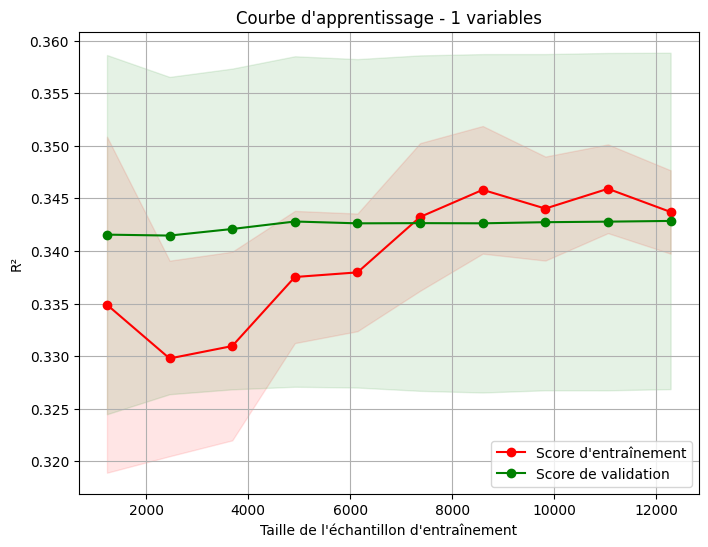

Modèle avec 2 variables : ['Nombre de pièces principales', 'Secteurs géographiques']
R² : 0.6999
RMSE : 2.2869
--------------------------------------------------


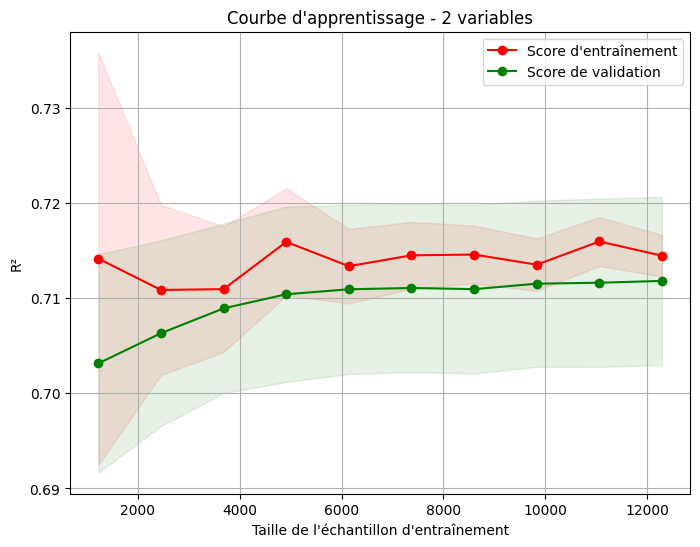

Modèle avec 3 variables : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location']
R² : 0.8438
RMSE : 1.6500
--------------------------------------------------


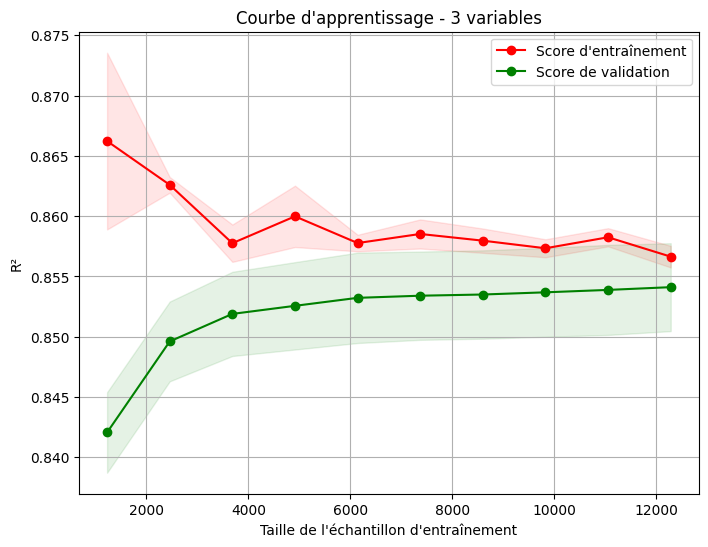

Modèle avec 4 variables : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location', 'Numéro du quartier']
R² : 0.8302
RMSE : 1.7203
--------------------------------------------------


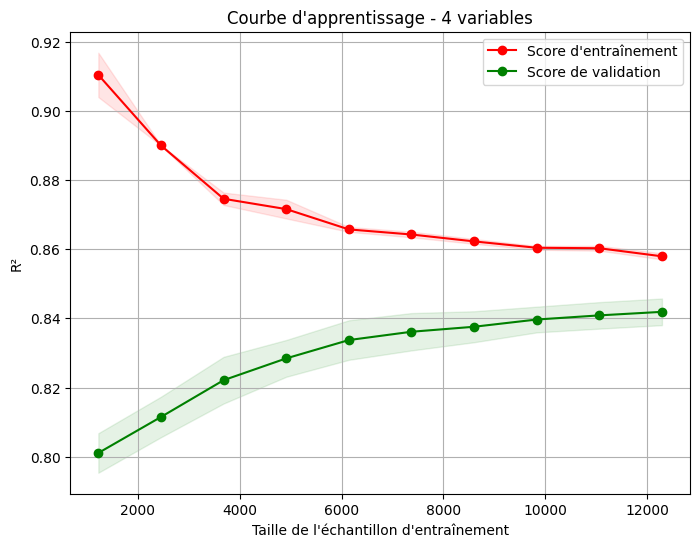

Modèle avec 5 variables : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location', 'Numéro du quartier', 'Epoque de construction']
R² : 0.9572
RMSE : 0.8638
--------------------------------------------------


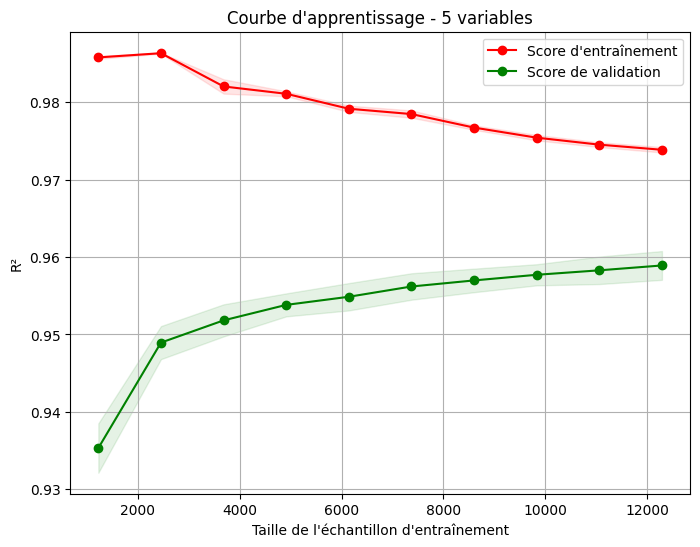

Modèle avec 6 variables : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location', 'Numéro du quartier', 'Epoque de construction', 'Distance_centroide']
R² : 0.9641
RMSE : 0.7908
--------------------------------------------------


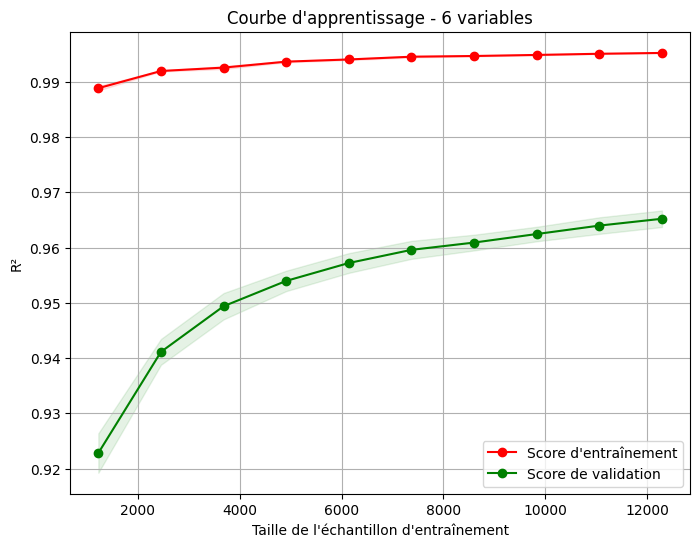

Modèle avec 7 variables : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location', 'Numéro du quartier', 'Epoque de construction', 'Distance_centroide', 'Année']
R² : 0.9809
RMSE : 0.5770
--------------------------------------------------


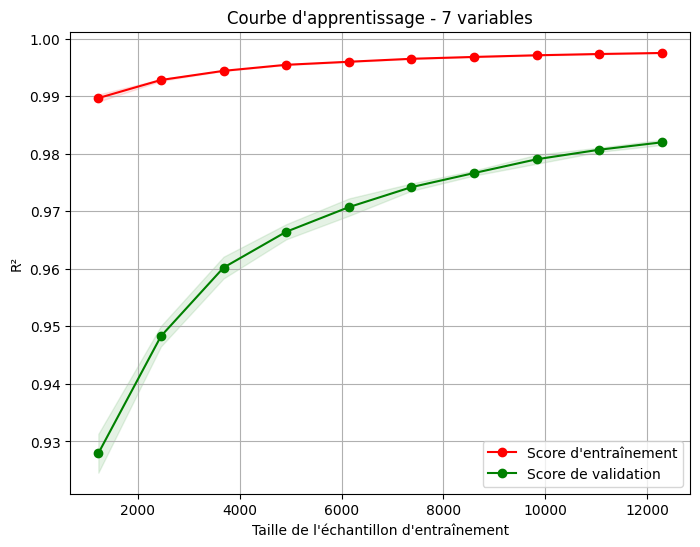

Variables utilisées : ['Nombre de pièces principales']
R² : 0.3325, RMSE : 3.4110
--------------------------------------------------
Variables utilisées : ['Nombre de pièces principales', 'Secteurs géographiques']
R² : 0.6999, RMSE : 2.2869
--------------------------------------------------
Variables utilisées : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location']
R² : 0.8438, RMSE : 1.6500
--------------------------------------------------
Variables utilisées : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location', 'Numéro du quartier']
R² : 0.8302, RMSE : 1.7203
--------------------------------------------------
Variables utilisées : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location', 'Numéro du quartier', 'Epoque de construction']
R² : 0.9572, RMSE : 0.8638
--------------------------------------------------
Variables utilisées : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location', 

In [88]:
# Ordre des variables par importance
features_ranked = ["Nombre de pièces principales", "Secteurs géographiques",
                   "Type de location", "Numéro du quartier",
                   "Epoque de construction", "Distance_centroide", "Année"]

# Initialisation des résultats
results = []

# Boucle pour ajouter progressivement les variables
for i in range(1, len(features_ranked) + 1):
    selected_features = features_ranked[:i]  # Sélection des i premières variables
    X_reduced = X[selected_features]

    # Division des données
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

    # Modèle Random Forest
    model = RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        random_state=42
    )

    # courbe d'apprentissage
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_reduced, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Moyennes et écart-types des scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Entraînement du modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    #performances
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((selected_features, r2, rmse))

    print(f"Modèle avec {i} variables : {selected_features}")
    print(f"R² : {r2:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print("-" * 50)

    # Tracé de la courbe d'apprentissage
    plt.figure(figsize=(8, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
    plt.title(f"Courbe d'apprentissage - {i} variables")
    plt.xlabel("Taille de l'échantillon d'entraînement")
    plt.ylabel("R²")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Analysons les résultats
for res in results:
    print(f"Variables utilisées : {res[0]}")
    print(f"R² : {res[1]:.4f}, RMSE : {res[2]:.4f}")
    print("-" * 50)


Modèle avec 1 variables : ['Nombre de pièces principales']
R² (test split)     : 0.3325
RMSE (test split)   : 3.4110
R² (cross-val, moy) : 0.3431
R² (cross-val, plis): [0.33246532 0.3411478  0.3599234  0.33586121 0.34592124]
------------------------------------------------------------


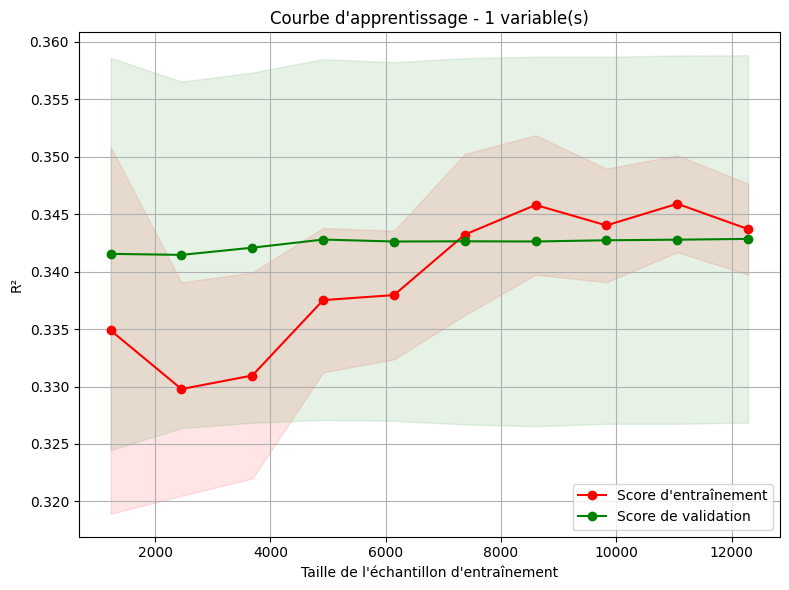

Modèle avec 2 variables : ['Nombre de pièces principales', 'Secteurs géographiques']
R² (test split)     : 0.6999
RMSE (test split)   : 2.2869
R² (cross-val, moy) : 0.7119
R² (cross-val, plis): [0.69989756 0.71855898 0.70977111 0.7065149  0.72459563]
------------------------------------------------------------


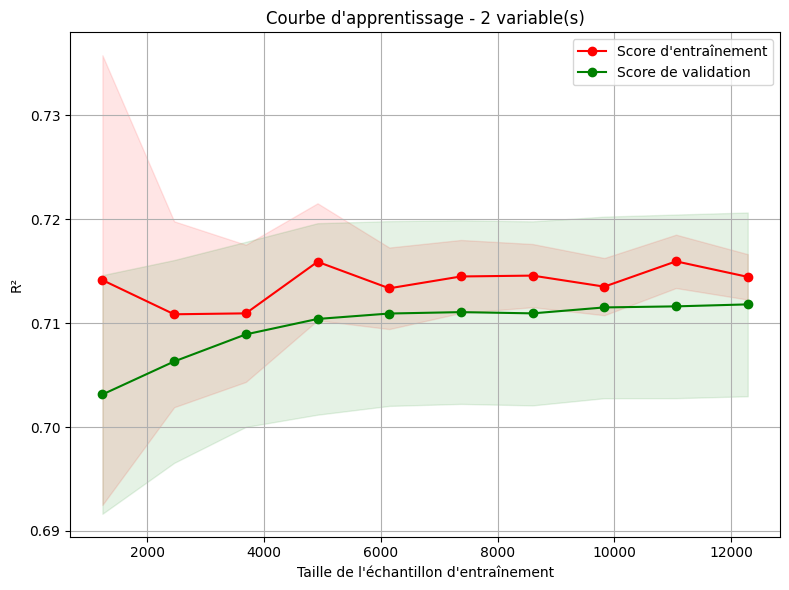

Modèle avec 3 variables : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location']
R² (test split)     : 0.8438
RMSE (test split)   : 1.6500
R² (cross-val, moy) : 0.8539
R² (cross-val, plis): [0.84372859 0.85253534 0.85726345 0.8527935  0.86340366]
------------------------------------------------------------


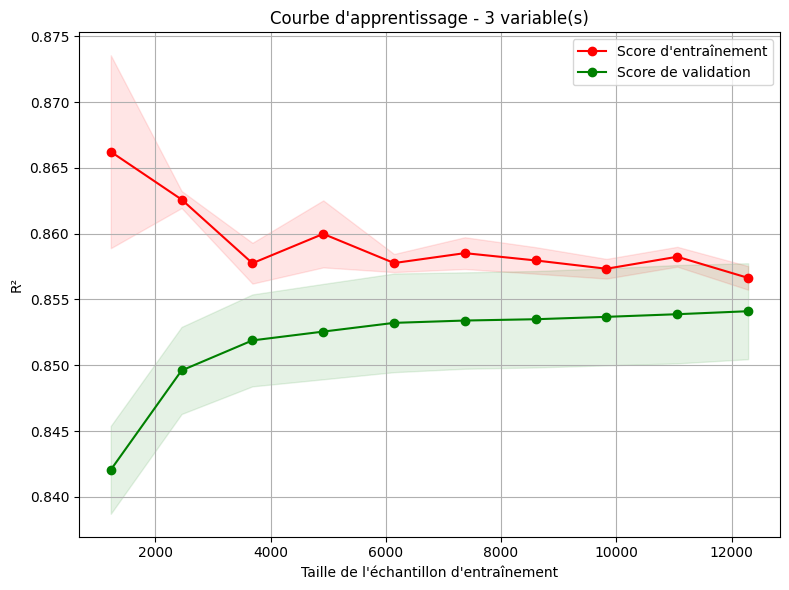

Modèle avec 4 variables : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location', 'Numéro du quartier']
R² (test split)     : 0.8302
RMSE (test split)   : 1.7203
R² (cross-val, moy) : 0.8417
R² (cross-val, plis): [0.83003688 0.83986823 0.8455316  0.84140577 0.85178647]
------------------------------------------------------------


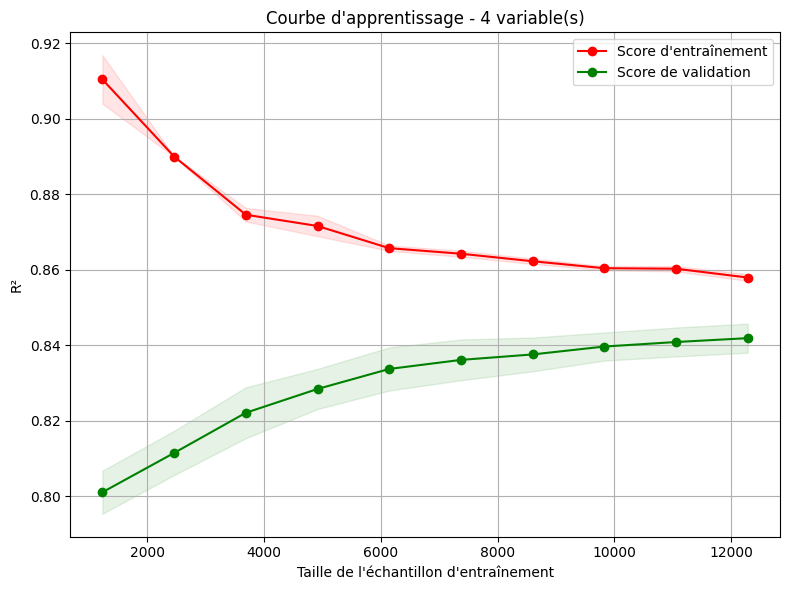

Modèle avec 5 variables : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location', 'Numéro du quartier', 'Epoque de construction']
R² (test split)     : 0.9572
RMSE (test split)   : 0.8638
R² (cross-val, moy) : 0.9586
R² (cross-val, plis): [0.95714594 0.95779555 0.95800892 0.95837012 0.96172779]
------------------------------------------------------------


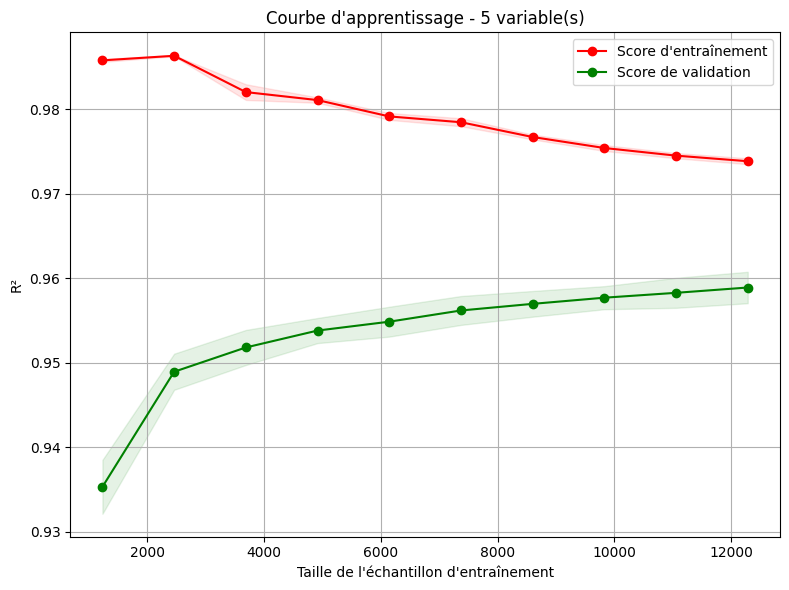

Modèle avec 6 variables : ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location', 'Numéro du quartier', 'Epoque de construction', 'Distance_centroide']
R² (test split)     : 0.9641
RMSE (test split)   : 0.7908
R² (cross-val, moy) : 0.9651
R² (cross-val, plis): [0.96404375 0.96379501 0.96549747 0.96403931 0.9681119 ]
------------------------------------------------------------


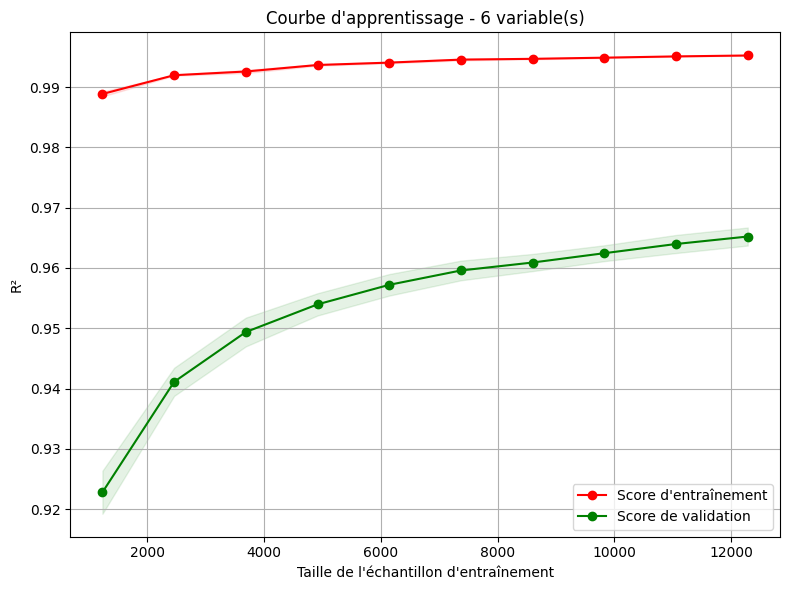

In [ ]:
# Ordre des variables par importance (à ajuster si besoin)
features_ranked = ["Nombre de pièces principales", "Secteurs géographiques",
                   "Type de location", "Numéro du quartier",
                   "Epoque de construction", "Distance_centroide", "Année"]

# Initialisation des résultats
results = []

# Boucle progressive sur les variables
for i in range(1, len(features_ranked) + 1):
    selected_features = features_ranked[:i]
    X_reduced = X[selected_features]

    # Division train/test
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

    # Modèle RandomForest
    model = RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        random_state=42
    )

    # Courbe d’apprentissage
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_reduced, y, cv=5, scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Entraînement / prédiction classique
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_test = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Validation croisée (sur tout X)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_r2 = cross_val_score(model, X_reduced, y, cv=kf, scoring='r2')
    cross_val_mean = np.mean(cross_val_r2)

    results.append({
        "variables": selected_features,
        "r2_test": r2_test,
        "rmse_test": rmse,
        "r2_crossval_mean": cross_val_mean,
        "r2_crossval_scores": cross_val_r2
    })

    # Affichage des scores
    print(f"Modèle avec {i} variables : {selected_features}")
    print(f"R² (test split)     : {r2_test:.4f}")
    print(f"RMSE (test split)   : {rmse:.4f}")
    print(f"R² (cross-val, moy) : {cross_val_mean:.4f}")
    print(f"R² (cross-val, plis): {cross_val_r2}")
    print("-" * 60)

    # Tracé des courbes d'apprentissage
    plt.figure(figsize=(8, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
    plt.title(f"Courbe d'apprentissage - {i} variable(s)")
    plt.xlabel("Taille de l'échantillon d'entraînement")
    plt.ylabel("R²")
    plt.legend(loc="best")
    plt.grid()
    plt.tight_layout()
    plt.show()

# Résumé final
for res in results:
    print("Variables utilisées :", res["variables"])
    print(f"R² (test)      : {res['r2_test']:.4f}")
    print(f"RMSE (test)    : {res['rmse_test']:.4f}")
    print(f"R² (cross-val) : {res['r2_crossval_mean']:.4f}")
    print("-" * 50)


Évaluation du modèle avec 4 variables...
R² : 0.8302
RMSE : 1.7203


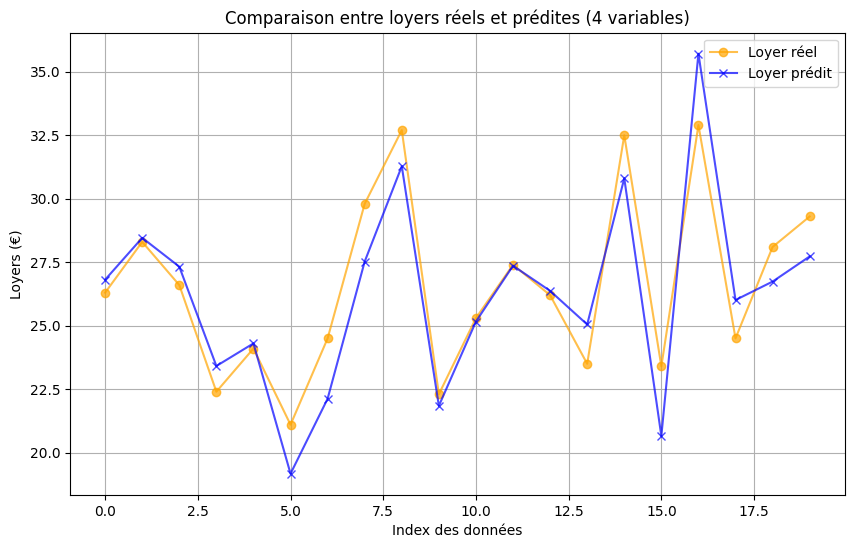

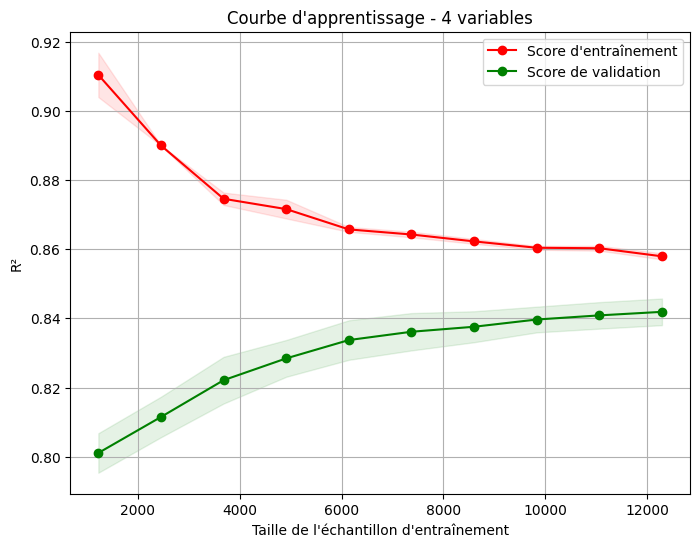

Évaluation du modèle avec 3 variables...
R² : 0.8438
RMSE : 1.6500


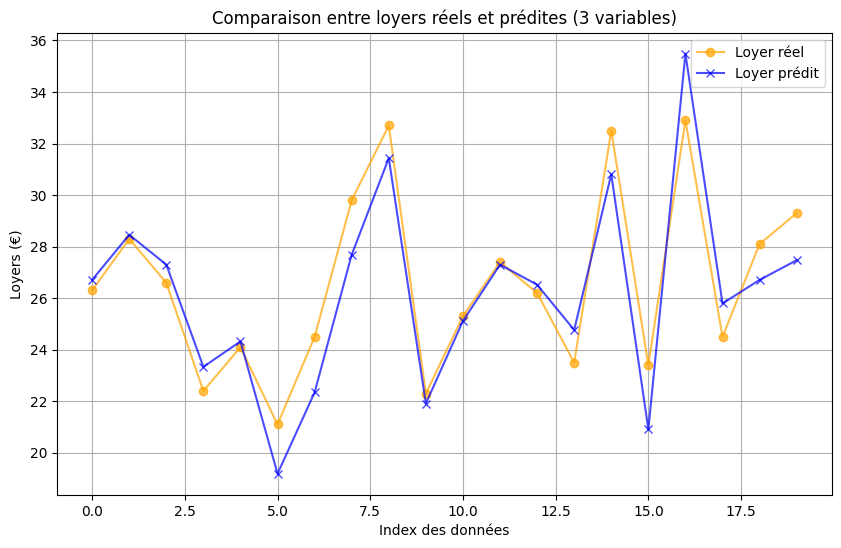

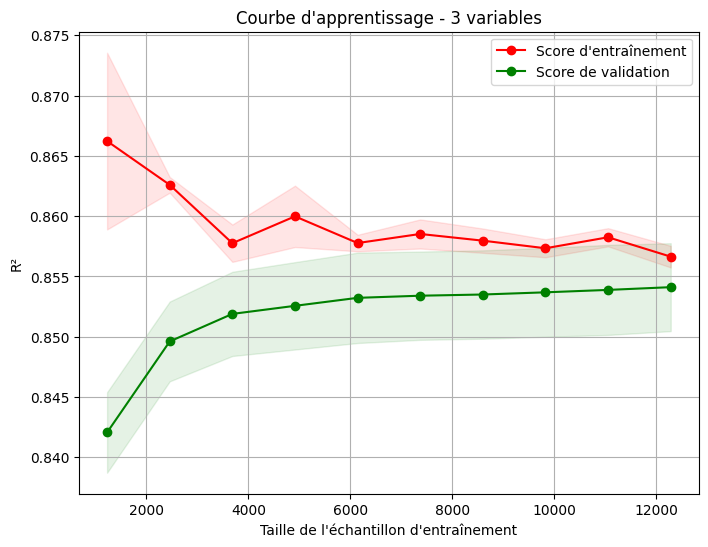

In [90]:
# Modèles pour 3 et 4 variables
variables_list = {
    "4 variables": ["Nombre de pièces principales", "Secteurs géographiques", "Type de location", "Numéro du quartier"],
    "3 variables": ["Nombre de pièces principales", "Secteurs géographiques", "Type de location"],
}

# Boucle sur chaque modèle
for model_name, selected_variables in variables_list.items():
    print(f"Évaluation du modèle avec {model_name}...")

    X_reduced = X[selected_variables]
    y = loy["Loyers de référence"]

    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

    model_reduced = RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        random_state=42
    )

    model_reduced.fit(X_train, y_train)

    # Prédictions
    y_pred = model_reduced.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"R² : {r2:.4f}")
    print(f"RMSE : {rmse:.4f}")

    # Sélectionnons les 20 premiers loyers
    y_test_sample = y_test[:20].values
    y_pred_sample = y_pred[:20]

    # Tracé des loyers réels et prédites
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test_sample)), y_test_sample, label="Loyer réel", marker='o', linestyle='-', color='orange', alpha=0.7)
    plt.plot(range(len(y_pred_sample)), y_pred_sample, label="Loyer prédit", marker='x', linestyle='-', color='blue', alpha=0.7)
    plt.title(f"Comparaison entre loyers réels et prédites ({model_name})")
    plt.xlabel("Index des données")
    plt.ylabel("Loyers (€)")
    plt.legend()
    plt.grid(True)
    plt.show()

    train_sizes, train_scores, test_scores = learning_curve(
        model_reduced, X_reduced, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Moyennes et écart-types des scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
    plt.title(f"Courbe d'apprentissage - {model_name}")
    plt.xlabel("Taille de l'échantillon d'entraînement")
    plt.ylabel("R²")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


In [91]:

scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print(f"R² moyen : {np.mean(scores):.4f} ± {np.std(scores):.4f}")


R² moyen : 0.9822 ± 0.0005


In [92]:
from sklearn.model_selection import RandomizedSearchCV

#Hyperparamètres à optimiser
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Modèle avec 3 variables
X_reduced_3 = X[["Nombre de pièces principales", "Secteurs géographiques", "Type de location"]]

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Nombre d'itérations aléatoires
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_reduced_3, y)

# Meilleurs paramètres
print("Meilleurs hyperparamètres : ", random_search.best_params_)


Meilleurs hyperparamètres :  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}


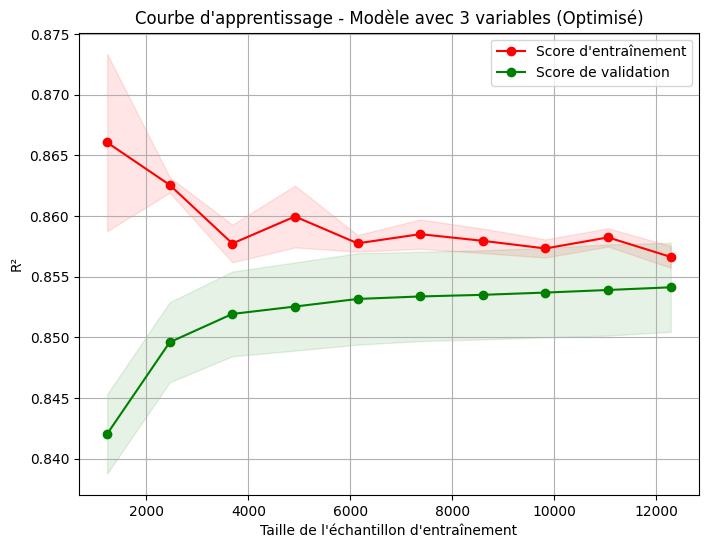

In [93]:
# Meilleurs hyperparamètres obtenus
best_params = random_search.best_params_

# Modèle avec les meilleurs hyperparamètres
best_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_reduced_3, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyennes et écart-types des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.title("Courbe d'apprentissage - Modèle avec 3 variables (Optimisé)")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid()
plt.show()


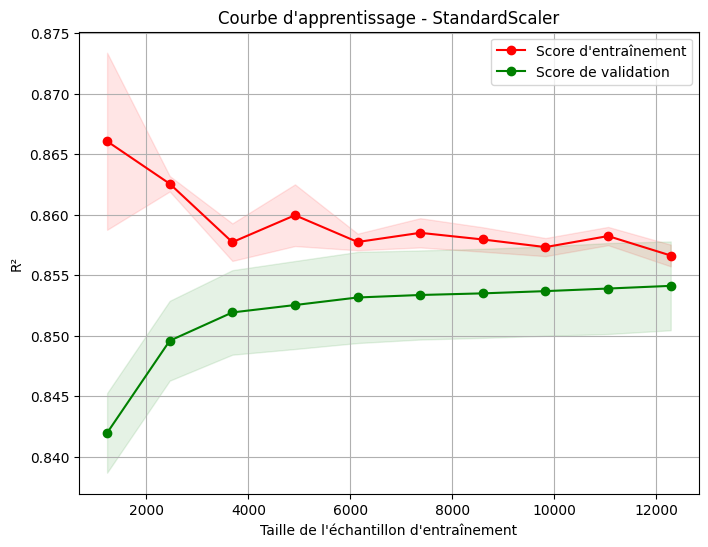

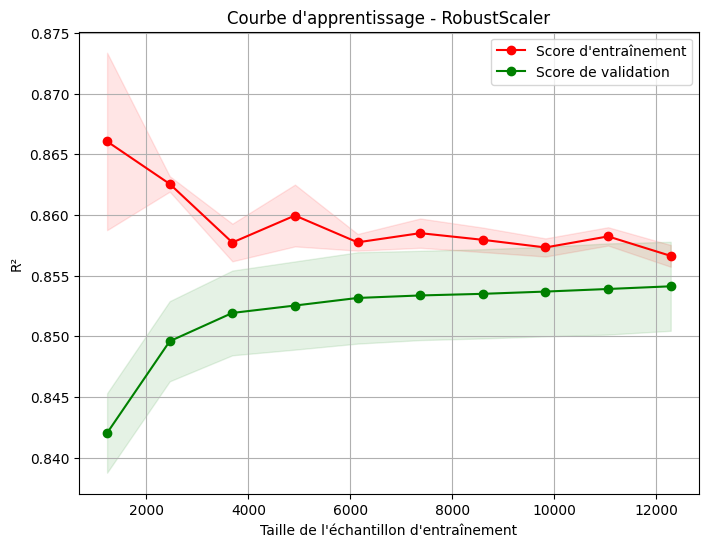

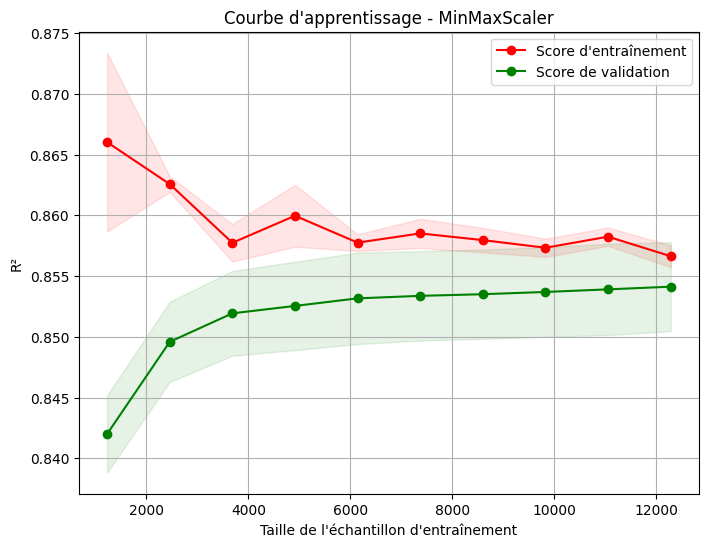

In [94]:

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline


# Liste des scalers à appliquer
scalers = {
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "MinMaxScaler": MinMaxScaler()
}

best_params = random_search.best_params_

# Initialisation du modèle avec les meilleurs hyperparamètres
best_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Itération sur chaque scaler
for scaler_name, scaler in scalers.items():
    # Pipeline avec scaler et modèle
    pipeline = Pipeline([
        ("scaler", scaler),
        ("model", best_model)
    ])

    # Calculer la courbe d'apprentissage
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X_reduced_3, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # Moyennes et écart-types des scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Tracer la courbe d'apprentissage
    plt.figure(figsize=(8, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
    plt.title(f"Courbe d'apprentissage - {scaler_name}")
    plt.xlabel("Taille de l'échantillon d'entraînement")
    plt.ylabel("R²")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


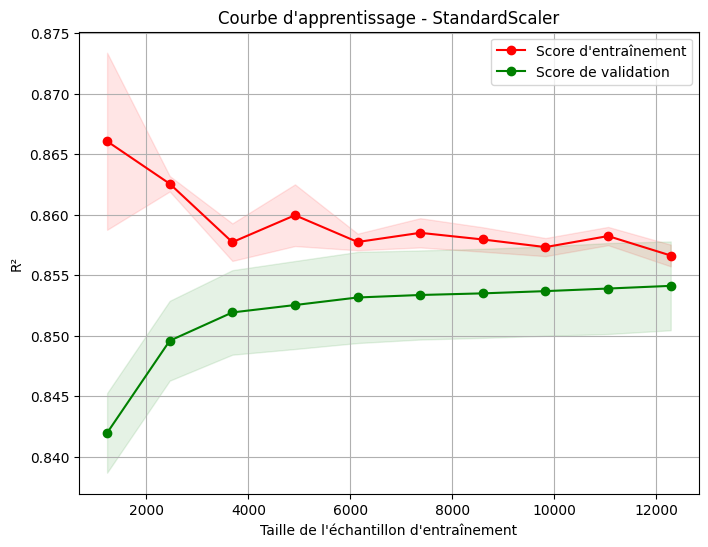

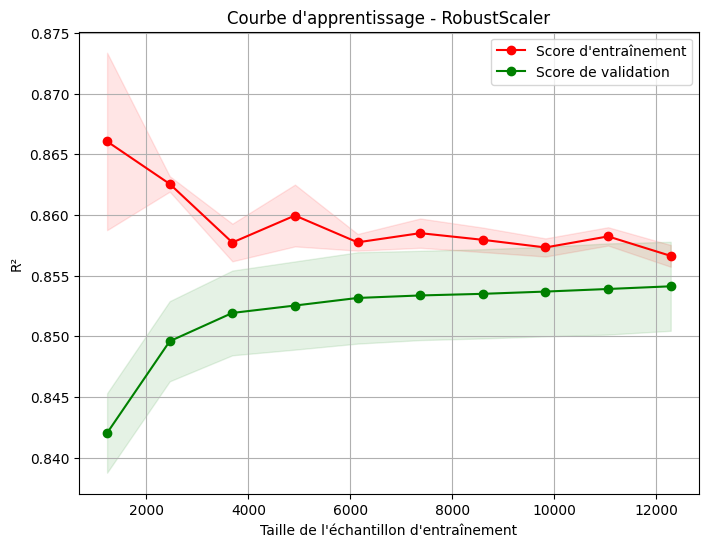

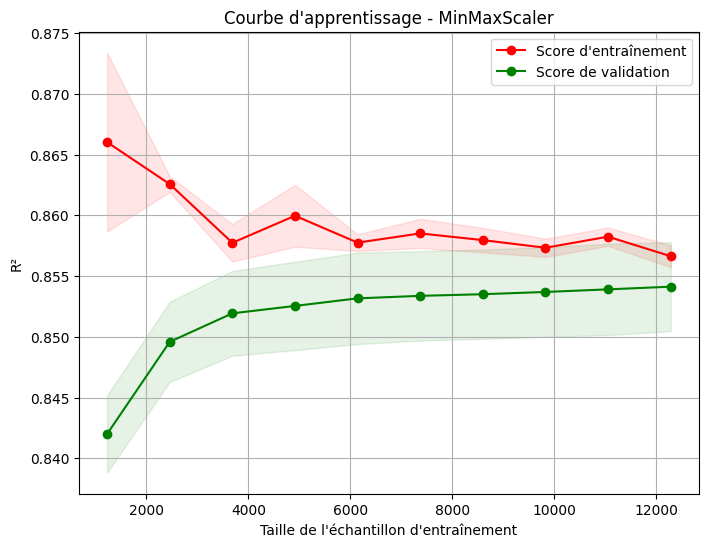


Résultats pour StandardScaler:
R² moyen : 0.8541 ± 0.0037
RMSE moyen : 1.6342 ± 0.0143

Résultats pour RobustScaler:
R² moyen : 0.8541 ± 0.0037
RMSE moyen : 1.6342 ± 0.0143

Résultats pour MinMaxScaler:
R² moyen : 0.8541 ± 0.0037
RMSE moyen : 1.6342 ± 0.0143


In [95]:


#RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Liste des scalers à appliquer
scalers = {
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "MinMaxScaler": MinMaxScaler()
}

# Meilleurs hyperparamètres obtenus
best_params = random_search.best_params_

# Initialisation du modèle avec les meilleurs hyperparamètres
best_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Scores pour chaque scaler
results = {}

# Itération sur chaque scaler
for scaler_name, scaler in scalers.items():
    # Pipeline avec scaler et modèle
    pipeline = Pipeline([
        ("scaler", scaler),
        ("model", best_model)
    ])

    # Validation croisée pour évaluer les performances
    r2_scores = cross_val_score(pipeline, X_reduced_3, y, cv=5, scoring='r2', n_jobs=-1)
    rmse_scores = cross_val_score(pipeline, X_reduced_3, y, cv=5, scoring=make_scorer(rmse, greater_is_better=False), n_jobs=-1)

    # Stocker les scores
    results[scaler_name] = {
        "R² moyen": np.mean(r2_scores),
        "R² écart-type": np.std(r2_scores),
        "RMSE moyen": -np.mean(rmse_scores),
        "RMSE écart-type": np.std(rmse_scores)
    }

    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X_reduced_3, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
    plt.title(f"Courbe d'apprentissage - {scaler_name}")
    plt.xlabel("Taille de l'échantillon d'entraînement")
    plt.ylabel("R²")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

#résultats des scores
for scaler_name, scores in results.items():
    print(f"\nRésultats pour {scaler_name}:")
    print(f"R² moyen : {scores['R² moyen']:.4f} ± {scores['R² écart-type']:.4f}")
    print(f"RMSE moyen : {scores['RMSE moyen']:.4f} ± {scores['RMSE écart-type']:.4f}")


Taille des ensembles : Entraînement=10752, Validation=2304, Test=2304
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Meilleurs hyperparamètres : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Performance sur l'ensemble de validation : R² = 0.8469, RMSE = 1.6501
Performance sur l'ensemble de test : R² = 0.8463, RMSE = 1.6293


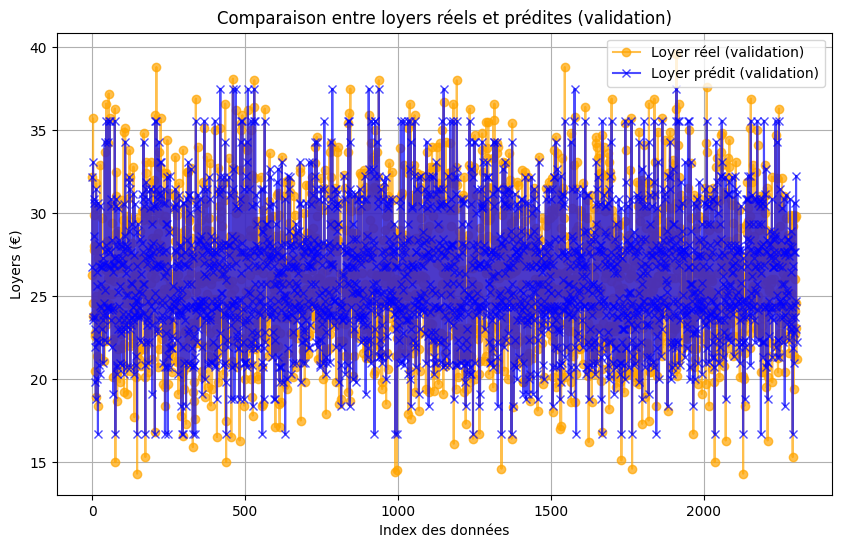

In [96]:

# Divisons les données en trois ensembles : entraînement, validation et test
X_train, X_temp, y_train, y_temp = train_test_split(X_reduced_3, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Taille des ensembles : Entraînement={len(X_train)}, Validation={len(X_val)}, Test={len(X_test)}")

# Définir les hyperparamètres à optimiser
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Recherche des meilleurs hyperparamètres avec validation croisée
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres et modèle optimisé
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Meilleurs hyperparamètres :", best_params)

# Évaluation sur l'ensemble de validation
y_val_pred = best_model.predict(X_val)
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Performance sur l'ensemble de validation : R² = {r2_val:.4f}, RMSE = {rmse_val:.4f}")

# Évaluation sur l'ensemble de test
y_test_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Performance sur l'ensemble de test : R² = {r2_test:.4f}, RMSE = {rmse_test:.4f}")

# Performances sur l'ensemble de validation

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_val)), y_val, label="Loyer réel (validation)", marker='o', linestyle='-', color='orange', alpha=0.7)
plt.plot(range(len(y_val)), y_val_pred, label="Loyer prédit (validation)", marker='x', linestyle='-', color='blue', alpha=0.7)
plt.title("Comparaison entre loyers réels et prédites (validation)")
plt.xlabel("Index des données")
plt.ylabel("Loyers (€)")
plt.legend()
plt.grid(True)
plt.show()


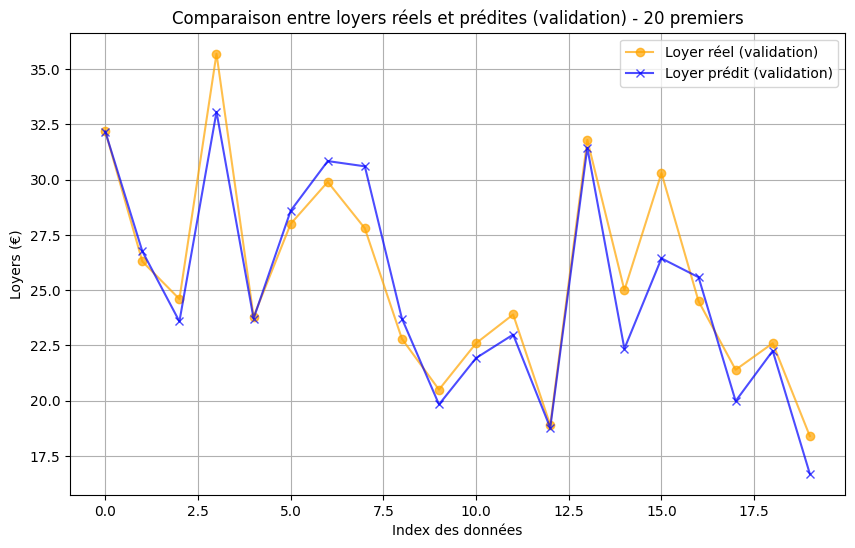

In [97]:
#20 premiers loyers de l'ensemble de validation
y_val_sample = y_val[:20].values
y_val_pred_sample = y_val_pred[:20]

# Tracons les loyers réels et prédites (20 premiers)
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_val_sample)), y_val_sample, label="Loyer réel (validation)", marker='o', linestyle='-', color='orange', alpha=0.7)
plt.plot(range(len(y_val_pred_sample)), y_val_pred_sample, label="Loyer prédit (validation)", marker='x', linestyle='-', color='blue', alpha=0.7)
plt.title("Comparaison entre loyers réels et prédites (validation) - 20 premiers")
plt.xlabel("Index des données")
plt.ylabel("Loyers (€)")
plt.legend()
plt.grid(True)
plt.show()


In [98]:

# Variables à exclure en nous basant sur le feature importance
variables_a_exclure = ["Année", "Distance_centroide", "Epoque de construction"]

# Création des données réduites
X_reduced = X.drop(columns=variables_a_exclure)

# Modèle Random Forest avec les meilleurs hyperparamètres
best_rf_reduced = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# Validation croisée
r2_scores = cross_val_score(best_rf_reduced, X_reduced, y, cv=5, scoring='r2')
rmse_scores = cross_val_score(
    best_rf_reduced, X_reduced, y, cv=5,
    scoring=make_scorer(mean_squared_error, squared=False)
)

# Affichage des résultats
print(f"R² moyen : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"RMSE moyen : {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.py", line 3195, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.

R² moyen : 0.8419 ± 0.0038
RMSE moyen : nan ± nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.py", line 3195, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.

R² : 0.8302
RMSE : 1.7203


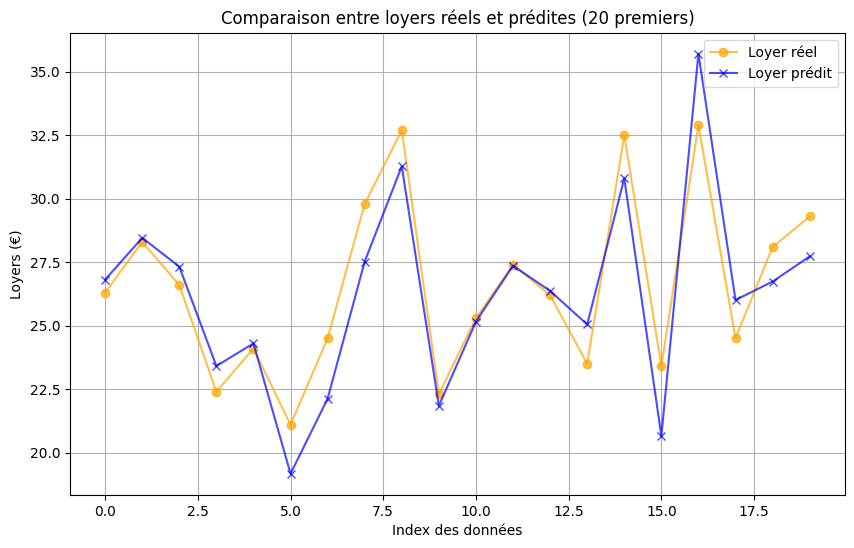

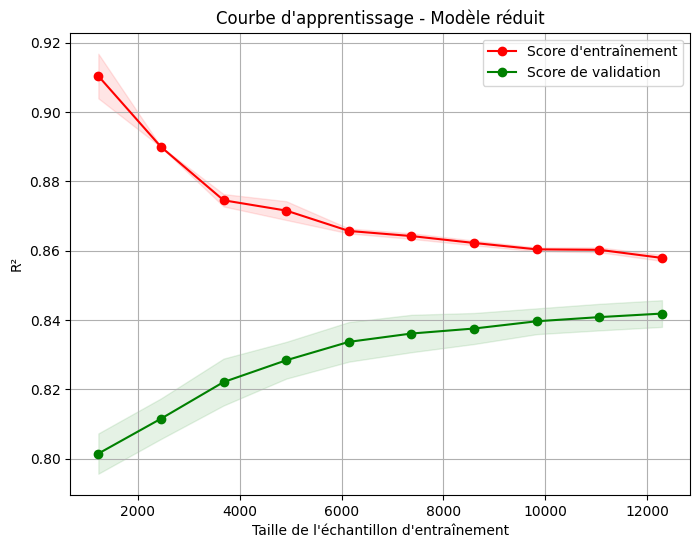

In [99]:
# Données réduites
X_reduced = X.drop(columns=["Année", "Distance_centroide", "Epoque de construction"])
y = loy["Loyers de référence"]

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Modèle Random Forest réduit
model_reduced = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

model_reduced.fit(X_train, y_train)

y_pred = model_reduced.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² : {r2:.4f}")
print(f"RMSE : {rmse:.4f}")

y_test_sample = y_test[:20].values
y_pred_sample = y_pred[:20]

# loyers réels et prédites
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_sample)), y_test_sample, label="Loyer réel", marker='o', linestyle='-', color='orange', alpha=0.7)
plt.plot(range(len(y_pred_sample)), y_pred_sample, label="Loyer prédit", marker='x', linestyle='-', color='blue', alpha=0.7)
plt.title("Comparaison entre loyers réels et prédites (20 premiers)")
plt.xlabel("Index des données")
plt.ylabel("Loyers (€)")
plt.legend()
plt.grid(True)
plt.show()

# courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    model_reduced, X_reduced, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Moyennes et écart-types des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.title("Courbe d'apprentissage - Modèle réduit")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid()
plt.show()


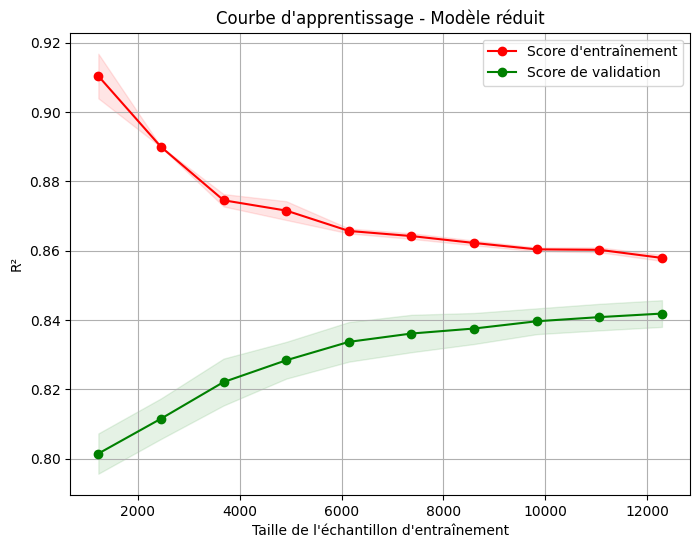

In [100]:

X_reduced = X.drop(columns=[ "Année","Distance_centroide", "Epoque de construction"])
y = loy["Loyers de référence"]

# Modèle Random Forest
model_reduced = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# Calcul de la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    model_reduced, X_reduced, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Moyenne et écart-type des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.title("Courbe d'apprentissage - Modèle réduit")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid()
plt.show()


R² : 0.8302
RMSE : 1.7203


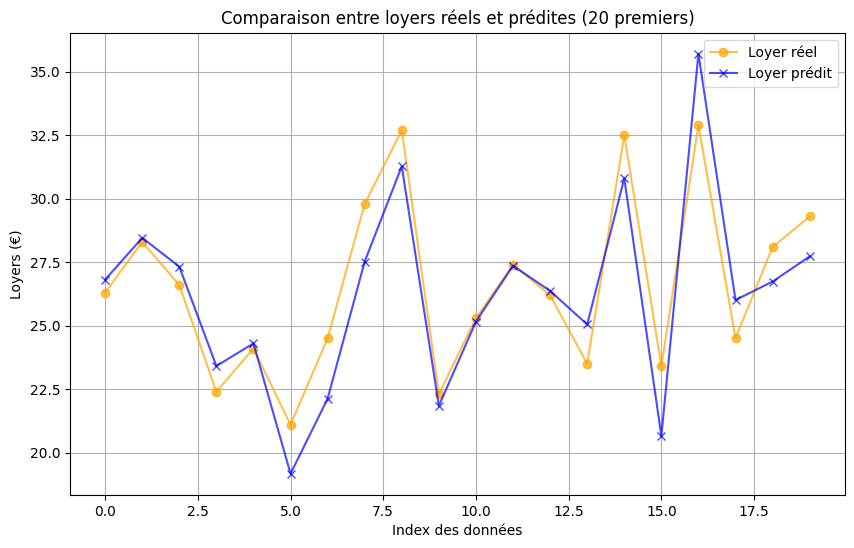

In [101]:
model_reduced.fit(X_train, y_train)
# Prédisons les loyers avec le modèle entraîné
y_pred = model_reduced.predict(X_test)

# Calculons les métriques pour évaluer les performances sur tout l'ensemble
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² : {r2:.4f}")
print(f"RMSE : {rmse:.4f}")

# Sélectionnons seulement les 20 premiers loyers
y_test_sample = y_test[:20]
y_pred_sample = y_pred[:20]

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_sample)), y_test_sample, label="Loyer réel", marker='o', linestyle='-', color='orange', alpha=0.7)
plt.plot(range(len(y_pred_sample)), y_pred_sample, label="Loyer prédit", marker='x', linestyle='-', color='blue', alpha=0.7)
plt.title("Comparaison entre loyers réels et prédites (20 premiers)")
plt.xlabel("Index des données")
plt.ylabel("Loyers (€)")
plt.legend()
plt.grid(True)
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Meilleurs hyperparamètres : {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}


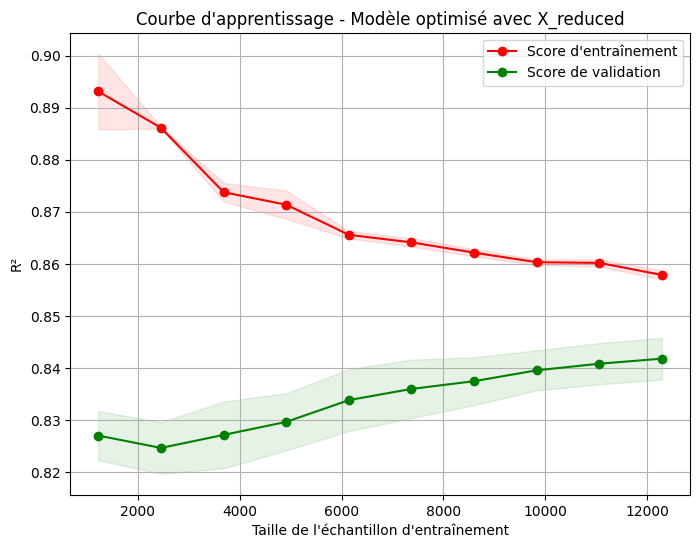

In [102]:
# Fonction pour évaluer le surapprentissage
def overfit_metric(estimator, X, y):
    scores_val = cross_val_score(estimator, X, y, cv=5, scoring='r2')
    scores_train = cross_val_score(estimator, X, y, cv=5, scoring='r2')
    return abs(np.mean(scores_train) - np.mean(scores_val))  # Différence absolue

#  scorer personnalisé pour le surapprentissage
overfit_scorer = make_scorer(overfit_metric, greater_is_better=False)

# Hyperparamètres à tester
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialisation du RandomizedSearchCV pour optimiser le modèle
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring=overfit_scorer,  # Minimiseation du surapprentissage
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Effectuons la recherche sur X_reduced
random_search.fit(X_reduced, y)
print("Meilleurs hyperparamètres :", random_search.best_params_)
best_rf = random_search.best_estimator_

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_reduced, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Moyenne et écart-type des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.title("Courbe d'apprentissage - Modèle optimisé avec X_reduced")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid()
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Meilleurs hyperparamètres : {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
R² sur l'ensemble de test : 0.8339
RMSE sur l'ensemble de test : 1.7015


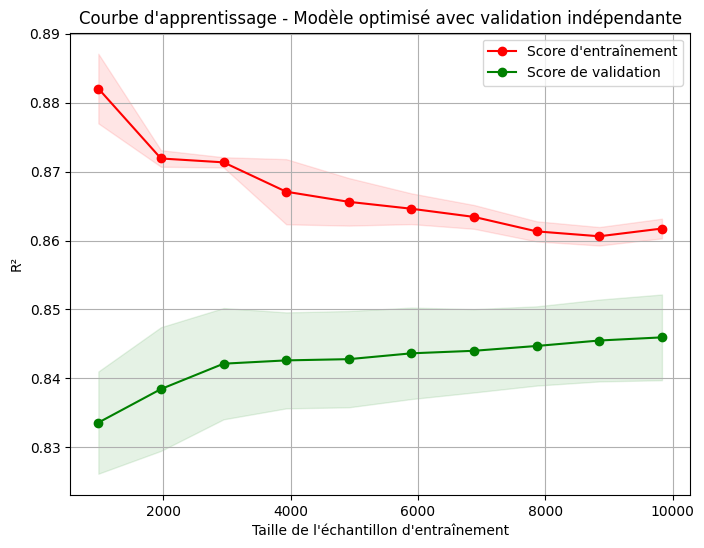

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(X_train, y_train)
print("Meilleurs hyperparamètres :", random_search.best_params_)
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² sur l'ensemble de test : {r2_test:.4f}")
print(f"RMSE sur l'ensemble de test : {rmse_test:.4f}")

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Moyenne et écart-type des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.title("Courbe d'apprentissage - Modèle optimisé avec validation indépendante")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid()
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Meilleurs hyperparamètres : {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
R² sur l'ensemble de test : 0.8339
RMSE sur l'ensemble de test : 1.7015


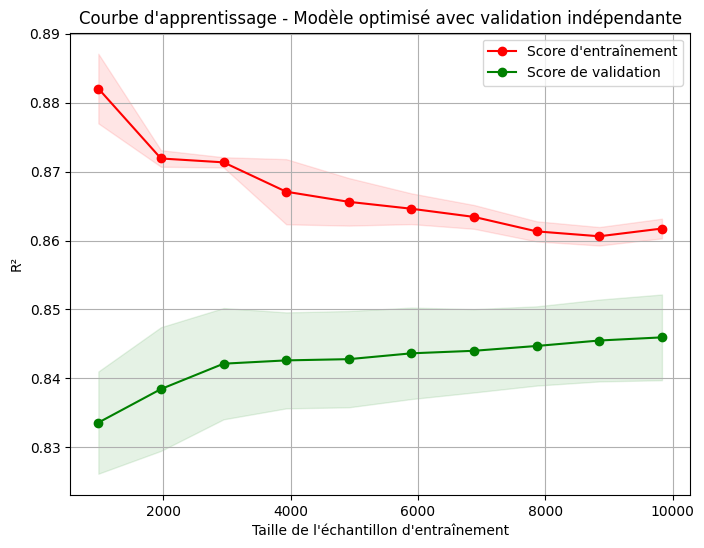

In [104]:

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Recherche des meilleurs hyperparamètres sur les données d'entraînement
random_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres :", random_search.best_params_)

best_rf = random_search.best_estimator_

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² sur l'ensemble de test : {r2_test:.4f}")
print(f"RMSE sur l'ensemble de test : {rmse_test:.4f}")

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.title("Courbe d'apprentissage - Modèle optimisé avec validation indépendante")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid()
plt.show()


#hIST


In [105]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

selected_features = ["Nombre de pièces principales", "Secteurs géographiques", "Type de location"]
X_selected = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Modèle HistGradientBoosting
model = HistGradientBoostingRegressor(
    learning_rate=0.1,
    max_iter=300,
    max_depth=10,
    min_samples_leaf=5,
    l2_regularization=1.0,
    random_state=42
)

# Entraînement
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(" Résultats sur le test set :")
print(f"R² (test split)   : {r2:.4f}")
print(f"RMSE (test split) : {rmse:.4f}")

# Validation croisée
cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='r2')
print("\n Résultats validation croisée :")
print("R² cross-val (plis) :", cv_scores)
print("R² cross-val (moy)  :", np.mean(cv_scores).round(4))


/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


 Résultats sur le test set :
R² (test split)   : 0.8435
RMSE (test split) : 1.6517

 Résultats validation croisée :
R² cross-val (plis) : [0.85262463 0.85616247 0.85305978 0.86000266 0.84854058]
R² cross-val (moy)  : 0.8541


Nous avons comparé deux modèles non linéaires (RandomForestRegressor et HistGradientBoostingRegressor) sur les 3 variables les plus prédictives. Les performances sont quasiment identiques (R² ≈ 0.85, RMSE ≈ 1.65). Cela confirme que ce sous-ensemble de variables est robuste et que le modèle ne présente pas de surapprentissage notable. Le choix final peut se faire en fonction du contexte (vitesse d'exécution, besoin d'interprétation, etc.)."

#XGBOOST

In [106]:
!pip install --upgrade scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 2.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [110]:
import xgboost
import sklearn
print(f"xgboost version: {xgboost.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")

xgboost version: 2.1.4
scikit-learn version: 1.6.1


In [111]:

from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [112]:
_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
# Modèle de base XGBoost
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='r2')
print(f"R² moyen (validation croisée) : {np.mean(scores):.4f} ± {np.std(scores):.4f}")

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(f"R² (test) : {r2_score(y_test, y_pred):.4f}")
print(f"RMSE (test) : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")



R² moyen (validation croisée) : 0.8561 ± 0.0059


ValueError: feature_names mismatch: ['Nombre de pièces principales', 'Secteurs géographiques', 'Type de location'] ['Secteurs géographiques', 'Numéro du quartier', 'Nombre de pièces principales', 'Type de location']
training data did not have the following fields: Numéro du quartier

In [ ]:

param_grid = {
    "n_estimators": [100, 300],
    "max_depth": [4, 6],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8],
    "colsample_bytree": [0.8],
    "reg_alpha": [0, 1],
    "reg_lambda": [1, 2]
}

xgb_base = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    verbosity=0
)

grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    verbose=1,
    n_jobs=1,
    error_score="raise"
)

grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("✅ Meilleurs paramètres trouvés :", grid_search.best_params_)
print("🔁 Score moyen validation croisée :", grid_search.best_score_)


In [ ]:
best_xgb = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    reg_alpha=1,
    reg_lambda=2,
    subsample=0.8,
    random_state=42
)

best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

print("R² (test set) :", round(r2_score(y_test, y_pred), 4))
print("RMSE (test set) :", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))


In [ ]:


residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Graphique des résidus – XGBoost optimisé")
plt.grid(True)
plt.show()


In [ ]:

#Modèle optimisé
best_xgb = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    reg_alpha=1,
    reg_lambda=2,
    subsample=0.8,
    random_state=42
)

# Calcul de la courbe d’apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_xgb,
    X_selected,  # <--- utilise tes 3 variables ici
    y,
    cv=5,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=1
)

# Moyennes et écart-types
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracé de la courbe
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.title("Courbe d'apprentissage – XGBoost optimisé")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Score R²")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
best_xgb.fit(X_train, y_train)

# Prédictions
y_pred_xgb = best_xgb.predict(X_test)

# Sélection des 20 premières valeurs
y_test_sample = y_test[:20]
y_pred_sample_xgb = y_pred_xgb[:20]

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_sample)), y_test_sample, label="Loyer réel", marker='o', linestyle='-', color='orange', alpha=0.7)
plt.plot(range(len(y_pred_sample_xgb)), y_pred_sample_xgb, label="Loyer prédit (XGBoost)", marker='x', linestyle='-', color='blue', alpha=0.7)
plt.title("Comparaison entre loyers réels et prédits – XGBoost (20 premiers)")
plt.xlabel("Index des données")
plt.ylabel("Loyers (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(range(20), y_test_sample, label="Loyer réel", marker='o', linestyle='-', color='black', alpha=0.8)
plt.plot(range(20), y_pred_sample, label="RandomForest", marker='x', linestyle='--', color='forestgreen', alpha=0.8)
plt.plot(range(20), y_pred_sample_xgb, label="XGBoost optimisé", marker='s', linestyle='--', color='royalblue', alpha=0.8)

plt.title("Comparaison des loyers réels vs prédits – RandomForest vs XGBoost")
plt.xlabel("Index des exemples")
plt.ylabel("Loyer (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

